# Plots & Machine Learning
### MinneMUDAC Data Science Challenge, Fall 2018

This is the machine learning portion of my code for the MinneMUDAC Data Science Challenge, Fall 2018. Please see the `README` for more information about the project. Note that only the more succesful methods are included here. The rest can be found in the worklog.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import imp
import numpy as np
import sklearn

# Ignore warnings. Careful with this one.
import warnings
warnings.simplefilter('ignore')

Let us start with some quick exploratory plots.

In [39]:
df_general=pd.read_csv('df_general.csv')
df_primary=pd.read_csv('df_primary.csv')
df_general=df_general.drop(columns=['Unnamed: 0'])
df_primary=df_primary.drop(columns=['Unnamed: 0'])
df_primary.head()

Year Eligible_voters Number_voters Per_turnout      EDR   PerEDR
0  1950       1,879,000       583,617      31.06%  No data  No data
1  1952       1,899,000       652,825      34.38%  No data  No data
2  1954       1,920,000       641,906      33.43%  No data  No data
3  1956       1,940,000       611,197      31.51%  No data  No data
4  1958       1,960,000       632,240      32.26%  No data  No data

In [40]:
import string

translator = str.maketrans('', '', string.punctuation)

# Let us get rid of the % signs and turn into numeric
df_primary['Per_turnout']=df_primary['Per_turnout'].str.replace("%","")

df_primary['Per_turnout']=pd.to_numeric(df_primary['Per_turnout'])


### General Percent Turnout

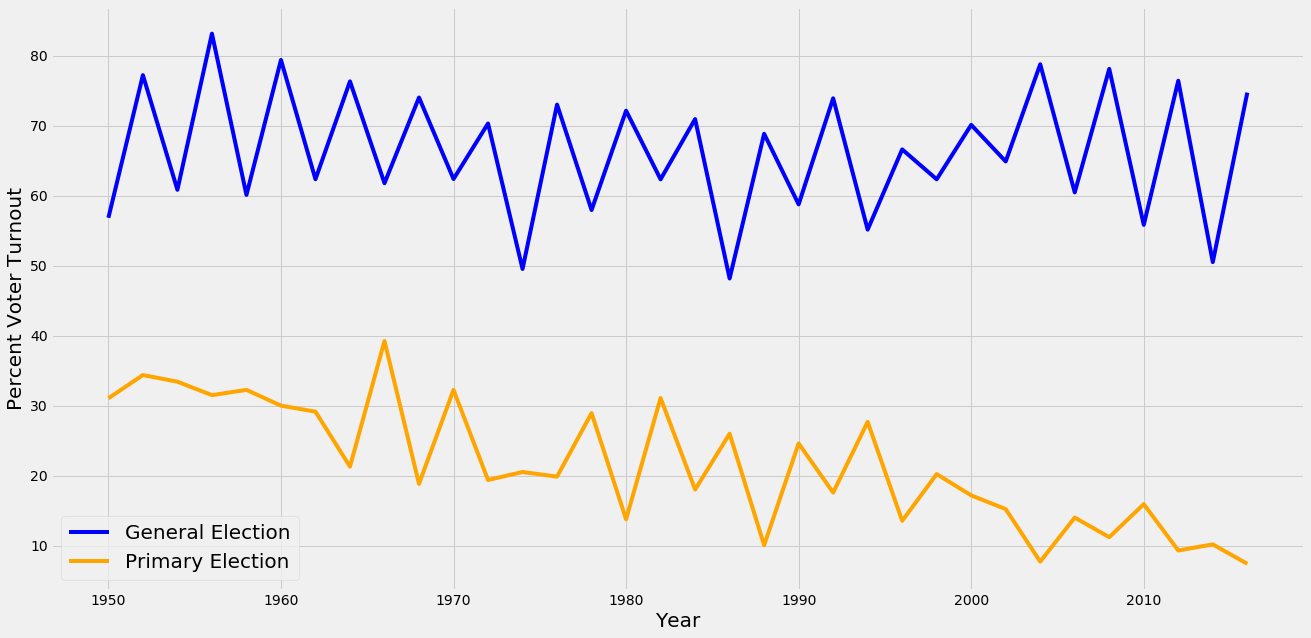

In [55]:
# General & primary elections percent turnout
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
plt.plot(df_general['Year'],df_general['Per_turnout'],color='blue',label='General Election')
plt.plot(df_primary['Year'],df_primary['Per_turnout'],color='orange',label='Primary Election')
plt.ylabel('Percent Voter Turnout',fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.legend(fontsize=20)
plt.show()

From a first glance, we see that the primary turnout might be following the trend somewhat, but that the peaks are inversely related to each other (i.e. when there is a peak in the general election, there is a 'dip' in the primary turnout and vice-versa). Furthermore, we can see that the general electionturnout is consistenly higher for presidential elections (as opposed to midterm elections), while primary election turnout is lower on presidential election years.

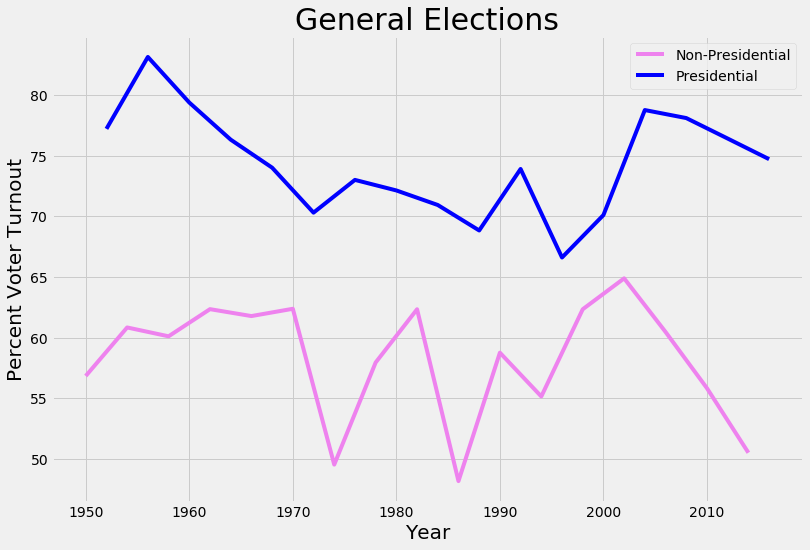

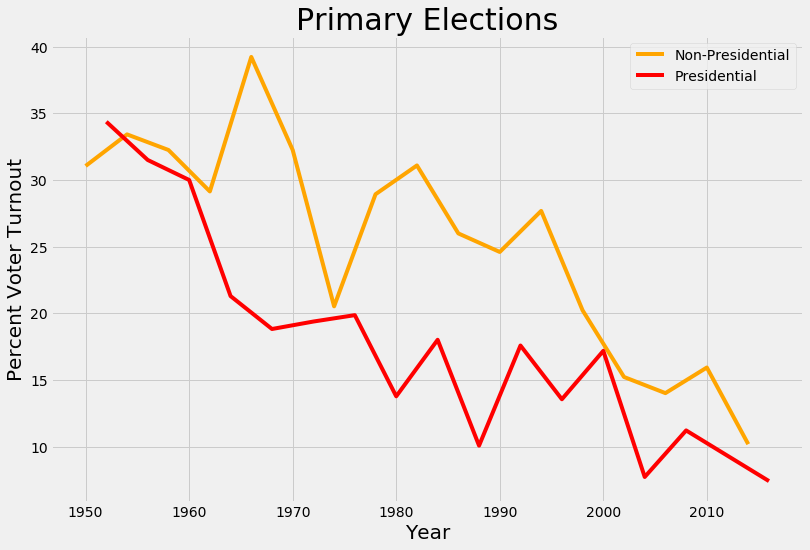

In [57]:
# Let us try the plots with presidential and midterm separate

# General election, non-presidential elections

plt.style.use('fivethirtyeight')
plt.figure(1, figsize=(12,8))
plt.plot(df_general['Year'][::2],df_general['Per_turnout'][::2],color='violet',label='Non-Presidential')
plt.plot(df_general['Year'][1::2],df_general['Per_turnout'][1::2],color='blue',label='Presidential')
plt.ylabel('Percent Voter Turnout',fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title('General Elections', fontsize=30)
plt.legend()


plt.figure(2, figsize=(12,8))
plt.plot(df_primary['Year'][::2],df_primary['Per_turnout'][::2],color='orange',label='Non-Presidential')
plt.plot(df_primary['Year'][1::2],df_primary['Per_turnout'][1::2],color='red',label='Presidential')
plt.ylabel('Percent Voter Turnout',fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.title('Primary Elections', fontsize=30)
plt.legend()

Well, that is not very illuminating. Let us move on to the congressional district level.

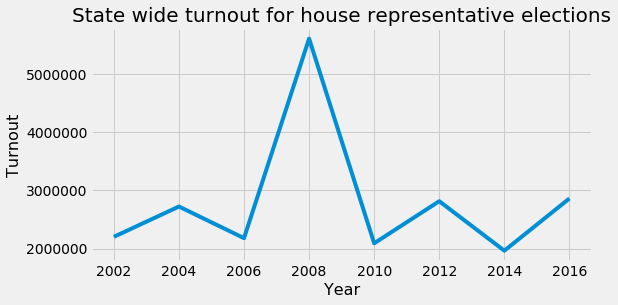

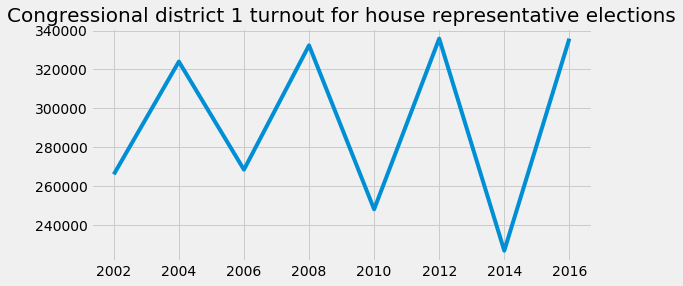

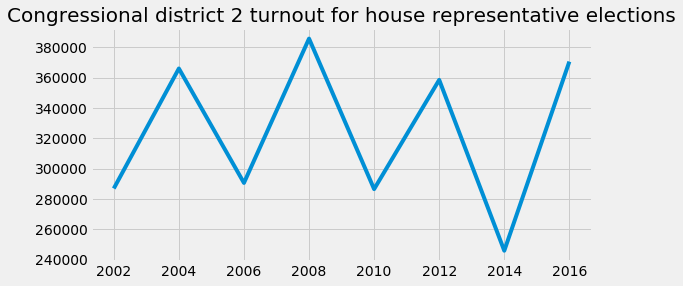

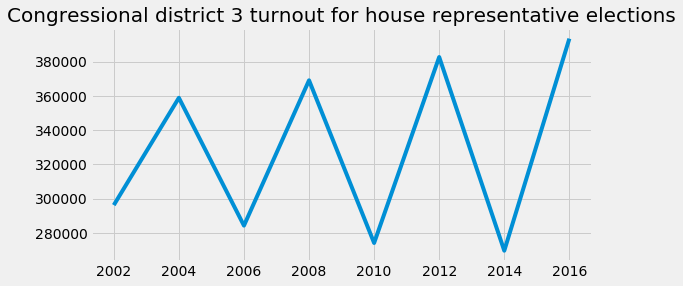

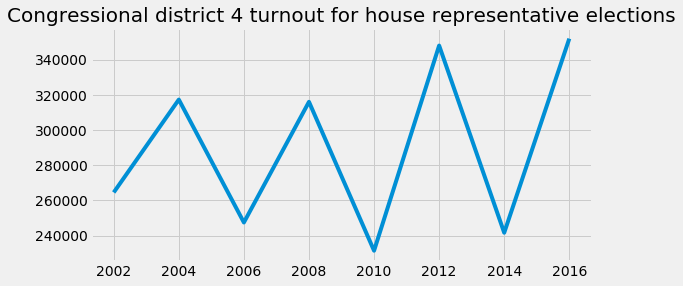

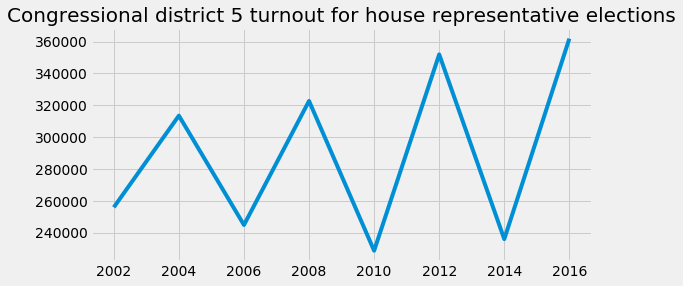

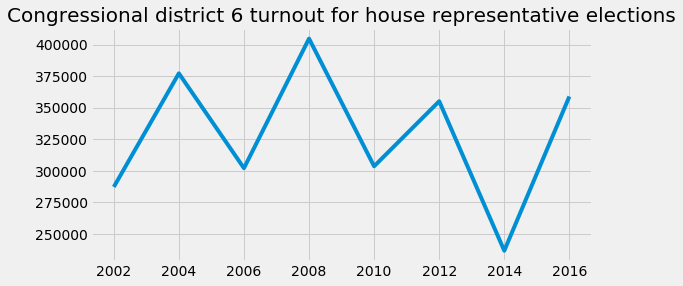

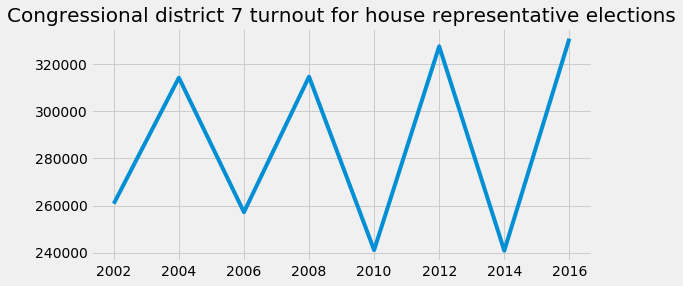

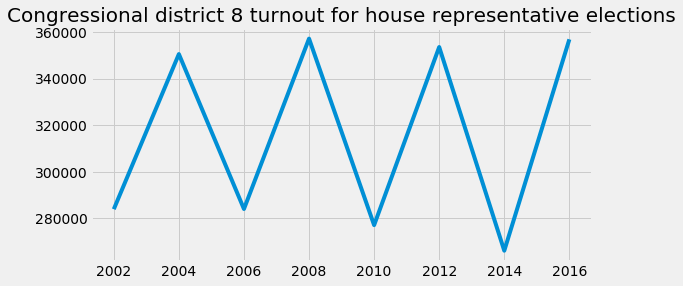

In [61]:
df_master=pd.read_csv('df_master_wed.csv')

# For example, let us plot turn out by congressional district.
temp=[]
for j in range(0,9):
    y=[]
    for i in range(2002,2018,2):
        y.append(df_master[(df_master['YEAR']==i)&(df_master['CG']==j)].iloc[0]['CONGTOT'])
    temp.append(y)
    
# Plot total  turnout for each congressional district for the years of 2002 to 2016

# State wide turnout for congressional elections
plt.figure(1,figsize=(8,4))
plt.plot(range(2002,2018,2),temp[0])
plt.title('State wide turnout for house representative elections', Size=20)
plt.xlabel('Year', Size= 16)
plt.ylabel('Turnout', Size=16)

# State wide turnout for each congressional district 
for i in range(1,9):
    plt.figure(i+1,figsize=(8,4))
    plt.plot(range(2002,2018,2),temp[i])
    plt.title('Congressional district %d turnout for house representative elections'%(i), Size=20)

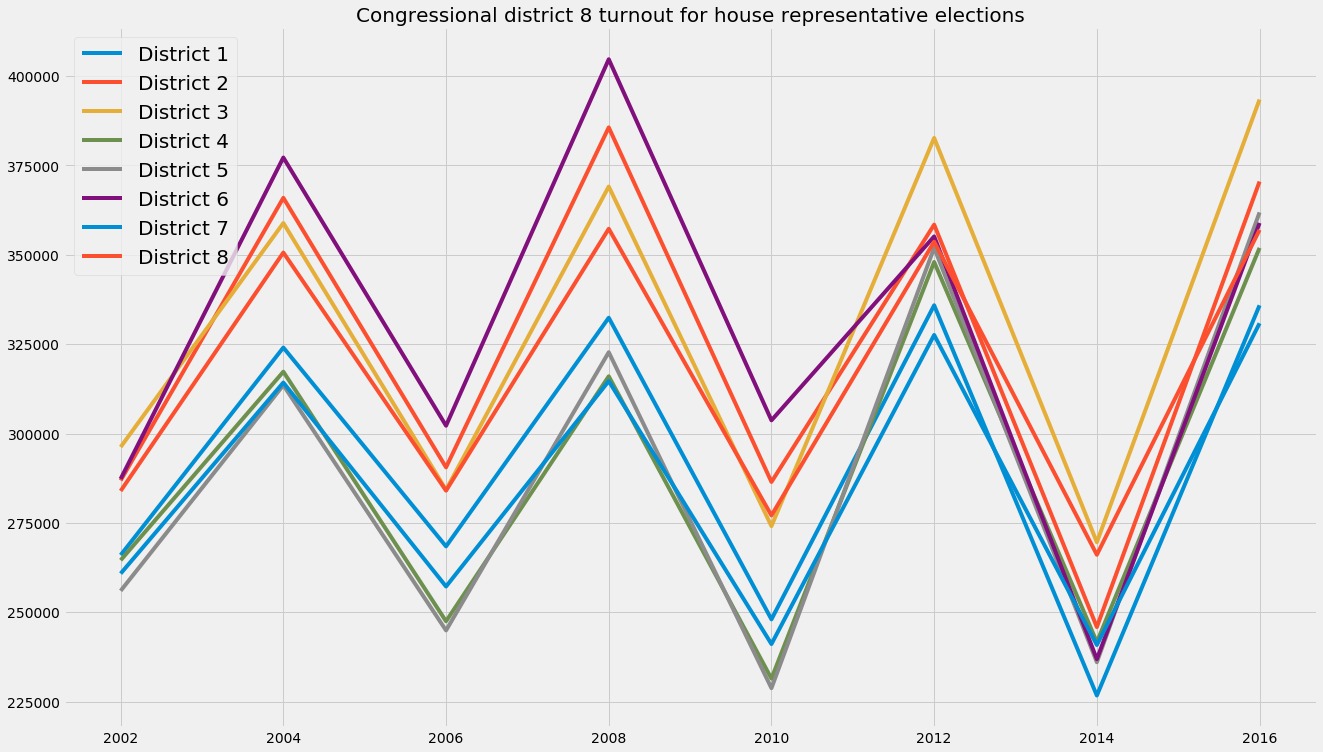

In [67]:
# Let us try them all together now

for i in range(1,9):
    plt.figure(1,figsize=(20,12))
    plt.plot(range(2002,2018,2),temp[i],label='District %d'%(i))
    plt.title('Congressional district %d turnout for house representative elections'%(i), Size=20)
    plt.legend(fontsize=20)

From this we see that the district seem to follow a pretty stable trend amongst each other, in the sense that they don't seem to cross very much.

Nest, let us plot just the midterm election years.

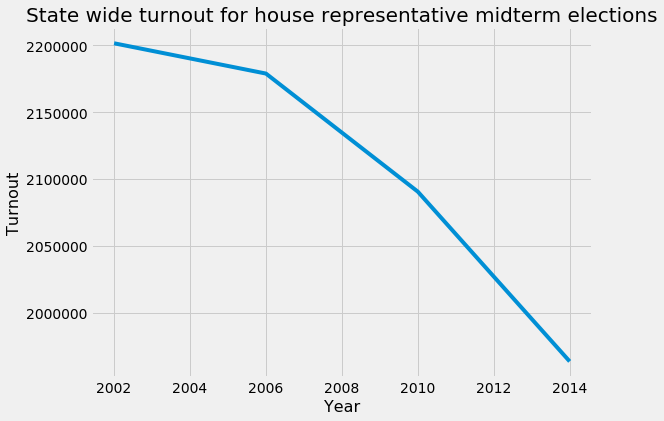

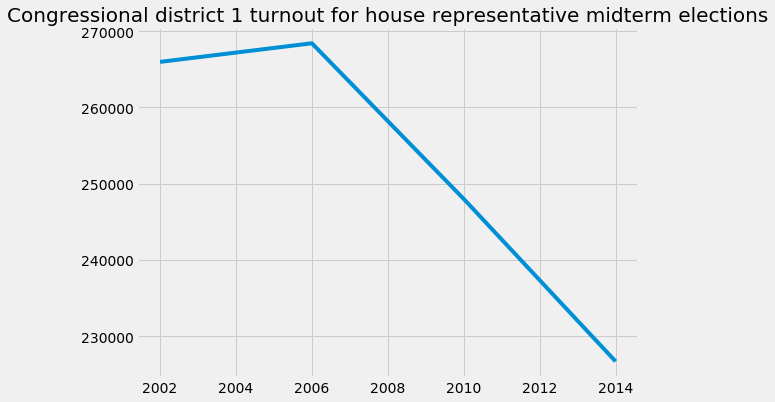

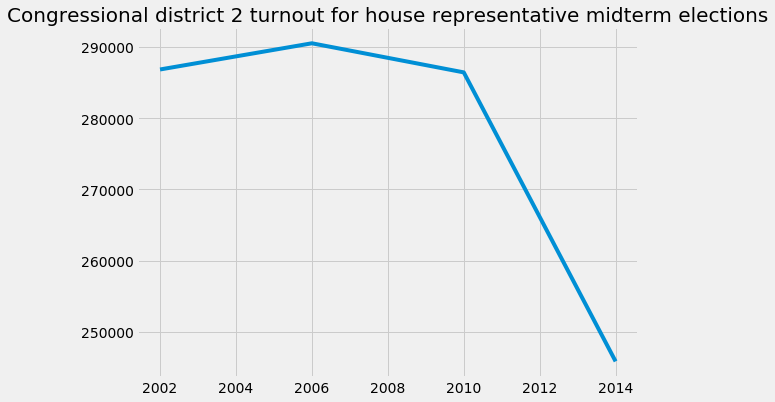

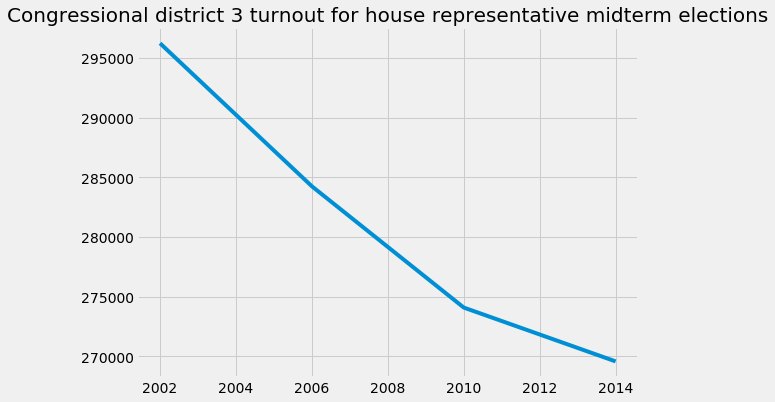

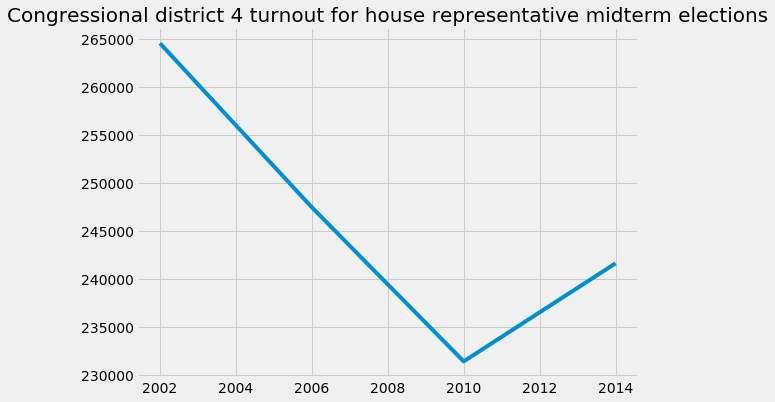

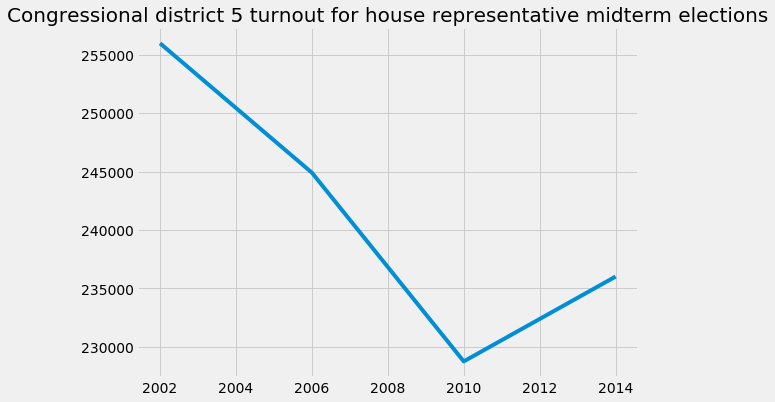

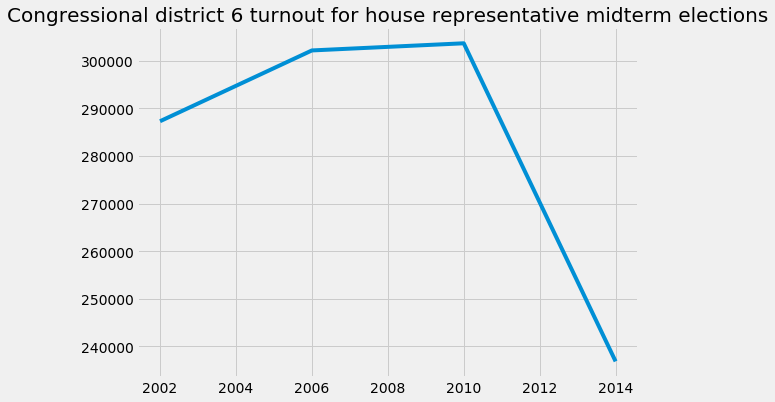

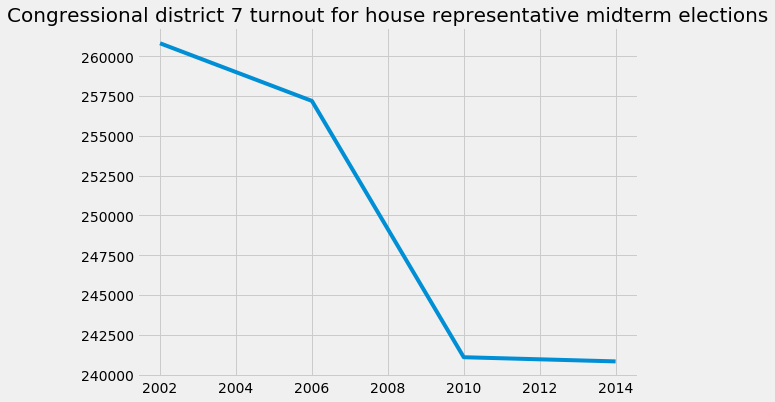

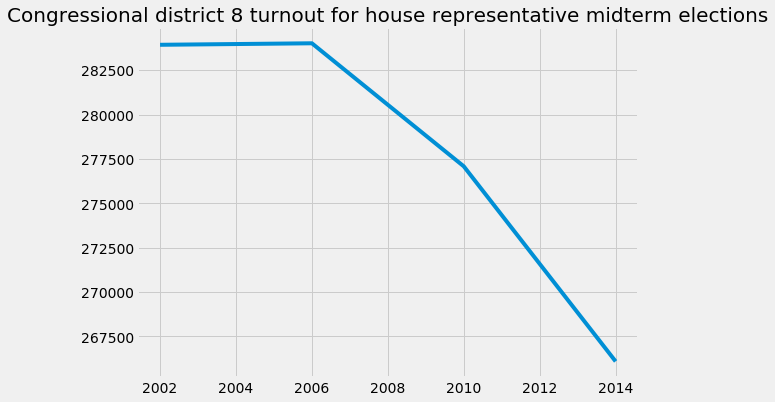

In [68]:
# For example, let us plot turn out by congressional district.
temp=[]
for j in range(0,9):
    y=[]
    for i in range(2002,2018,4):
        y.append(df_master[(df_master['YEAR']==i)&(df_master['CG']==j)].iloc[0]['CONGTOT'])
    temp.append(y)
    
# Plot total  turnout for each congressional district for the years of 2002 to 2016

# State wide turnout for congressional elections
plt.figure(1,figsize=(8,6))
plt.plot(range(2002,2018,4),temp[0])
plt.title('State wide turnout for house representative midterm elections', Size=20)
plt.xlabel('Year', Size= 16)
plt.ylabel('Turnout', Size=16)

# State wide turnout for each congressional district 
for i in range(1,9):
    plt.figure(i+1,figsize=(8,6))
    plt.plot(range(2002,2018,4),temp[i])
    plt.title('Congressional district %d turnout for house representative midterm elections'%(i), Size=20)

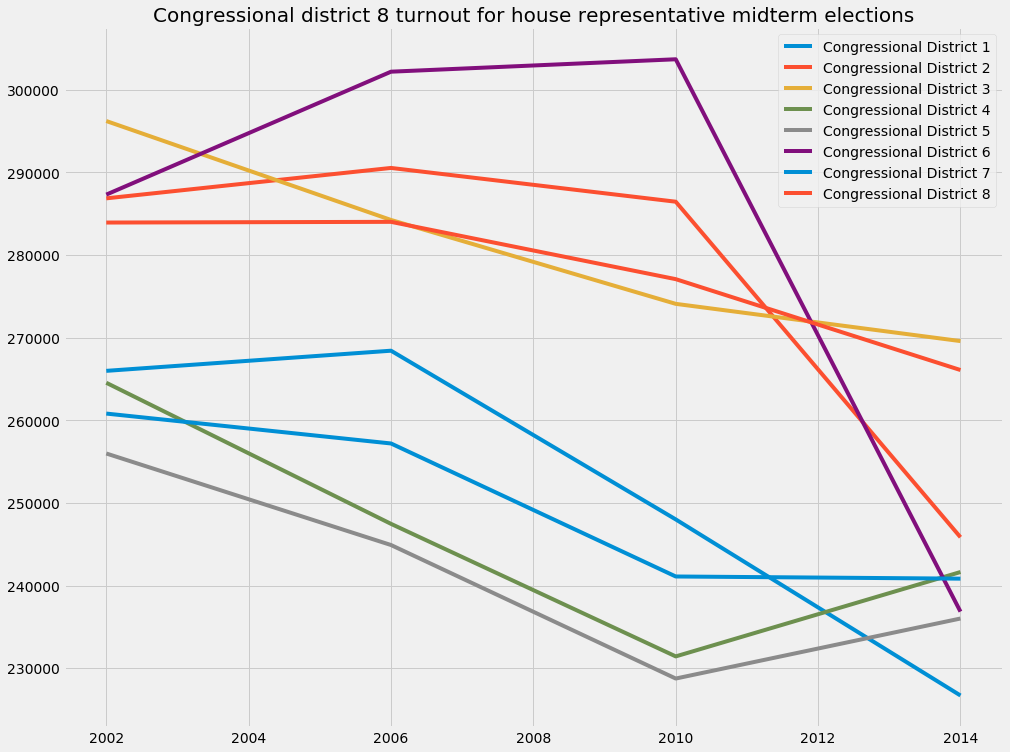

In [71]:
# All together.

for i in range(1,9):
    plt.figure(1,figsize=(15,12))
    plt.plot(range(2002,2018,4),temp[i],label='Congressional District %d'%(i))
    plt.title('Congressional district %d turnout for house representative midterm elections'%(i), Size=20)
    plt.legend()

From this we see that most districts seem to be following a decreasing trend for the last years.

Next, let us plot turnout by party.

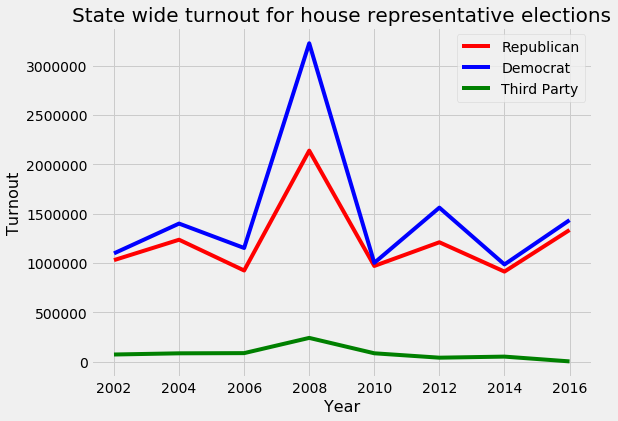

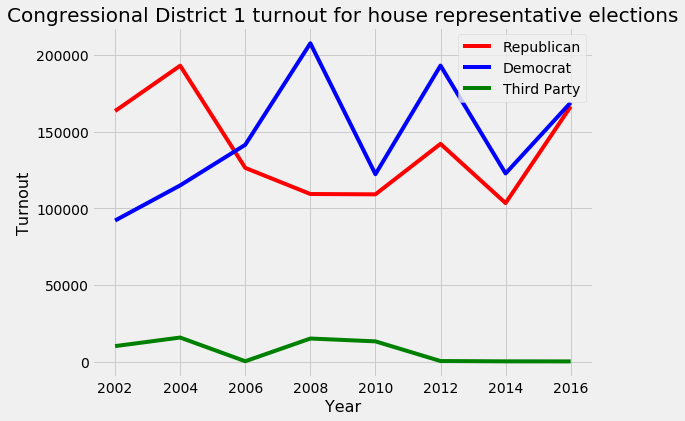

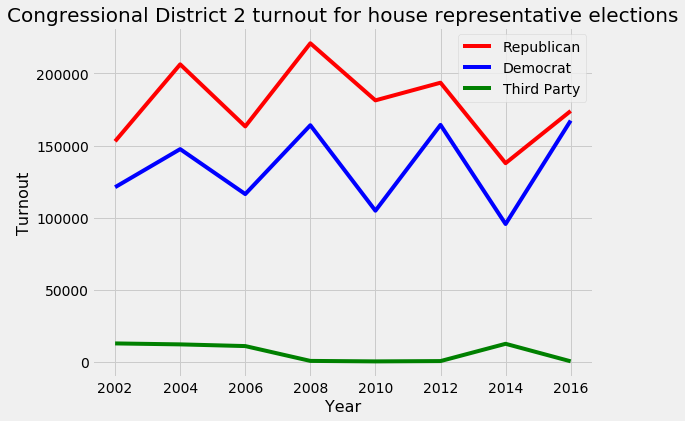

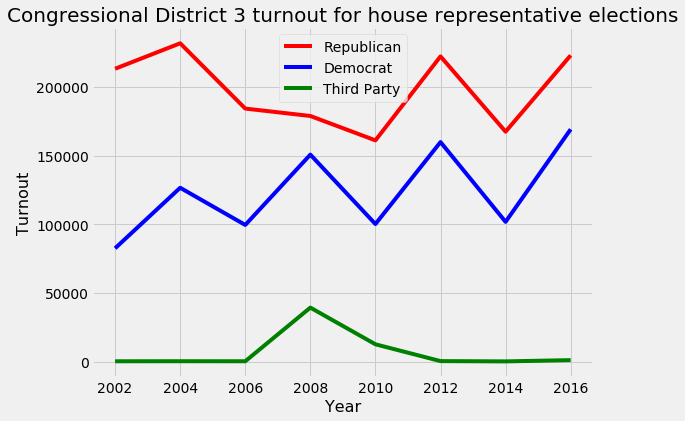

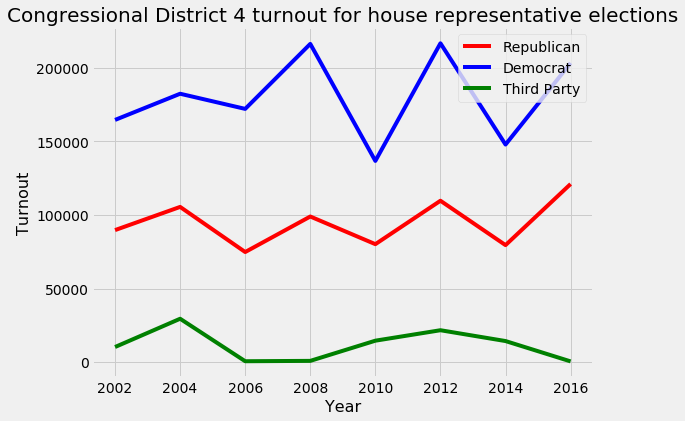

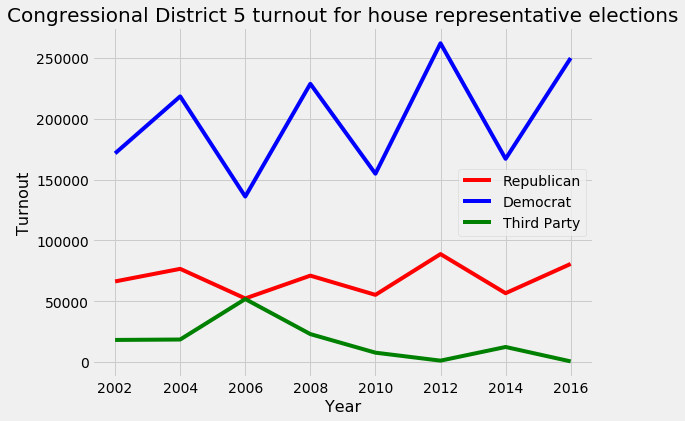

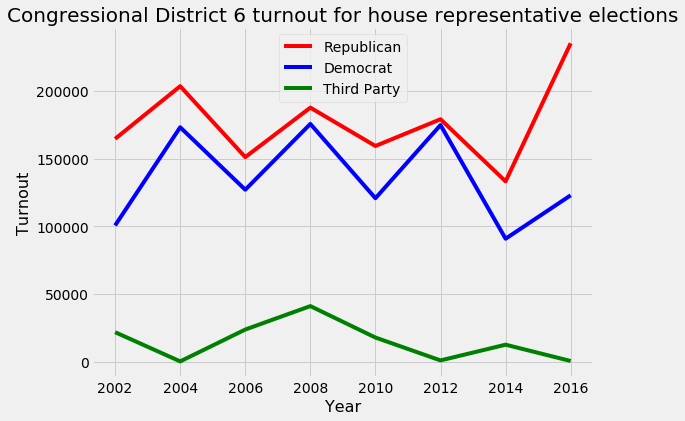

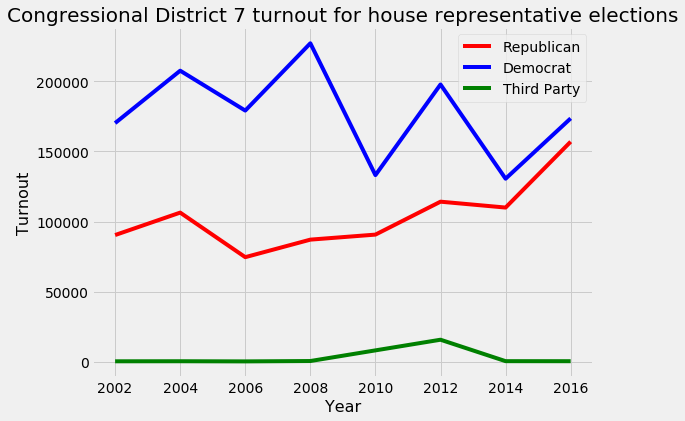

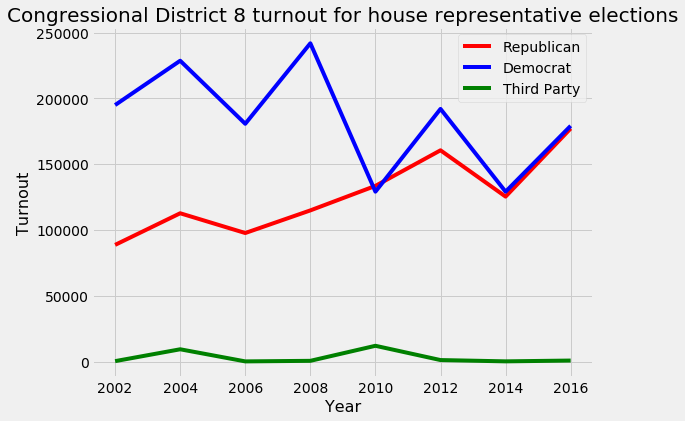

In [72]:
temp=[]
for j in range(0,9):
    rep=[]
    dem=[]
    third=[]
    for i in range(2002,2018,2):
        rep.append(df_master[(df_master['YEAR']==i)&(df_master['CG']==j)].iloc[0]['CONGIR'])
        dem.append(df_master[(df_master['YEAR']==i)&(df_master['CG']==j)].iloc[0]['CONGDFL'])
        third.append(df_master[(df_master['YEAR']==i)&(df_master['CG']==j)].iloc[0]['CONGTH'])
    temp.append([rep,dem,third])
    
# State wide turnout for congressional elections
plt.figure(1,figsize=(8,6))
plt.plot(range(2002,2018,2),temp[0][0],color='red',label='Republican')
plt.plot(range(2002,2018,2),temp[0][1],color='blue',label='Democrat')
plt.plot(range(2002,2018,2),temp[0][2],color='green',label='Third Party')
plt.title('State wide turnout for house representative elections', Size=20)
plt.legend()
plt.xlabel('Year', Size= 16)
plt.ylabel('Turnout', Size=16)


# Turnout for each congressional district, for house representative elections
for i in range(1,9):
    plt.figure(i+1,figsize=(8,6))
    plt.plot(range(2002,2018,2),temp[i][0],color='red',label='Republican')
    plt.plot(range(2002,2018,2),temp[i][1],color='blue',label='Democrat')
    plt.plot(range(2002,2018,2),temp[i][2],color='green',label='Third Party')
    plt.title('Congressional District %d turnout for house representative elections'%(i), Size=20)
    plt.legend()
    plt.xlabel('Year', Size= 16)
    plt.ylabel('Turnout', Size=16)

From this we can see that some congressional districts seem to have 'converging' republican and democrat turnout. These might be good candidates for potential 'flips'. Next, let us proceed to

### <font color='orange'> Classic Machine Learning with state-wide data </font>

Here we use only statewide data, since we are training a model to predict statewide turnout. Again, the reason for training separate models (one at the statewide level and one at the congressional district level) is that we don't want to throw away the historical census data we had. For, had we insisted on training a single model, we would be forced to use data for 2004 and after only, because of drastic re-districting (for one).

   - Generalized Linear models
       - Linear Regression (Ordinary Least Squares) 
       - Ridge Regression
       - Lasso Regression
       - Logistic Regression
   - SVM
   - Decision Tree methods
   
   
<font color='red'> Note </font>
that because of the large amount of features have two 'types' of approaches:
   
   - Use models that 'naturally' select features, such as Lasso and Elastic Net
   - First use sklearns' `SelectKBest` (univariate linear regression tests) to reduce the number of features and then use other regression models.

Let us begin by loading the statewide level data.

In [81]:
df_state=pd.read_csv('df_state_ml.csv')
df_state.head()

Unnamed: 0  YEAR   AGE0-17  AGE18-34  AGE35-49  AGE50-69  AGE70-100  \
0           0  1950  0.297810  0.249623  0.193565  0.202865   0.056138   
1           1  1960  0.361409  0.204856  0.183872  0.185346   0.064517   
2           2  1970  0.352826  0.246394  0.159213  0.168829   0.072739   
3           3  1980  0.278443  0.305635  0.158309  0.175342   0.082271   
4           4  1990  0.256264  0.283639  0.208312  0.162653   0.089132   

   INC0-10k  INC10k-20k  INC20k-40k   ...    RACE_9     SEX_1     SEX_2  high  \
0  1.000000    0.000000    0.000000   ...       0.0  0.503318  0.496682    48   
1  0.963312    0.029216    0.007472   ...       0.0  0.495410  0.504590    45   
2  0.837427    0.136298    0.021257   ...       0.0  0.484921  0.515079    43   
3  0.575629    0.268393    0.132573   ...       0.0  0.488968  0.511032    50   
4  0.375774    0.256768    0.265430   ...       0.0  0.490965  0.509035    45   

   low  precipitation  wind  pres  prim_pt  gen_pt  
0   37           0.00    10   0.0   31.06%   56.84  
1   37           0.00    18   1.0   30.01%   79.39  
2   34           0.53    22   0.0   32.26%   62.38  
3   25           0.02    21   1.0   13.78%   72.14  
4   30           0.00    16   0.0    24.61   58.76  

[5 rows x 57 columns]

In [82]:
# Let us get rid of the first column
df_state=df_state.drop(columns=['Unnamed: 0'])
df_state.head(30)

YEAR   AGE0-17  AGE18-34  AGE35-49  AGE50-69  AGE70-100  INC0-10k  \
0   1950  0.297810  0.249623  0.193565  0.202865   0.056138  1.000000   
1   1960  0.361409  0.204856  0.183872  0.185346   0.064517  0.963312   
2   1970  0.352826  0.246394  0.159213  0.168829   0.072739  0.837427   
3   1980  0.278443  0.305635  0.158309  0.175342   0.082271  0.575629   
4   1990  0.256264  0.283639  0.208312  0.162653   0.089132  0.375774   
5   2000  0.252168  0.234014  0.245508  0.177051   0.091259  0.240205   
6   2002  0.256116  0.206406  0.248813  0.195660   0.093005  0.223972   
7   2004  0.237914  0.231197  0.243956  0.203409   0.083523  0.223805   
8   2006  0.231908  0.233324  0.232045  0.212188   0.090535  0.222246   
9   2008  0.229741  0.232569  0.221081  0.228030   0.088579  0.215141   
10  2010  0.232409  0.229923  0.209534  0.237433   0.090701  0.208226   
11  2012  0.227169  0.233475  0.197402  0.246634   0.095320  0.203558   
12  2014  0.223994  0.234500  0.188894  0.254655   0.097957  0.194530   
13  2016  0.223559  0.228840  0.189935  0.255783   0.101882  0.172630   

    INC10k-20k  INC20k-40k  INC40k-60k   ...      RACE_9     SEX_1     SEX_2  \
0     0.000000    0.000000    0.000000   ...    0.000000  0.503318  0.496682   
1     0.029216    0.007472    0.000000   ...    0.000000  0.495410  0.504590   
2     0.136298    0.021257    0.005018   ...    0.000000  0.484921  0.515079   
3     0.268393    0.132573    0.014349   ...    0.000000  0.488968  0.511032   
4     0.256768    0.265430    0.066446   ...    0.000000  0.490965  0.509035   
5     0.197448    0.323408    0.136962   ...    0.001064  0.494689  0.505311   
6     0.181371    0.311775    0.157329   ...    0.001134  0.491880  0.508120   
7     0.179948    0.305835    0.157301   ...    0.000899  0.496082  0.503918   
8     0.180971    0.285945    0.164764   ...    0.001269  0.497048  0.502952   
9     0.165183    0.277027    0.169232   ...    0.001623  0.497344  0.502656   
10    0.185385    0.271024    0.162818   ...    0.002515  0.496704  0.503296   
11    0.170426    0.268786    0.168697   ...    0.002002  0.496830  0.503170   
12    0.167217    0.260471    0.172163   ...    0.002342  0.495957  0.504043   
13    0.157558    0.267416    0.176150   ...    0.003058  0.496947  0.503053   

    high  low  precipitation  wind  pres  prim_pt  gen_pt  
0     48   37           0.00    10   0.0   31.06%   56.84  
1     45   37           0.00    18   1.0   30.01%   79.39  
2     43   34           0.53    22   0.0   32.26%   62.38  
3     50   25           0.02    21   1.0   13.78%   72.14  
4     45   30           0.00    16   0.0    24.61   58.76  
5     48   30           0.06    24   1.0    17.19   70.11  
6     36   30           0.03    12   0.0    15.23   64.89  
7     48   36           0.06    17   1.0     7.73   78.77  
8     61   44           0.00    15   0.0    14.02   60.47  
9     71   51           0.00    25   1.0    11.22   78.11  
10    56   34           0.00    17   0.0    15.94   55.83  
11    44   38           0.31    20   1.0     9.32   76.42  
12    53   37           0.00    29   0.0    10.19   50.51  
13    59   39           0.00    17   1.0     7.42   74.72  

[14 rows x 56 columns]

In [83]:
# We also need to remove our outcome variables
df_ml=df_state.drop(columns=['YEAR','gen_pt'])
df_ml.columns.values

array(['AGE0-17', 'AGE18-34', 'AGE35-49', 'AGE50-69', 'AGE70-100',
       'INC0-10k', 'INC10k-20k', 'INC20k-40k', 'INC40k-60k',
       'INC60k-100k', 'INC>100k', 'EDUC_0.0', 'EDUC_1.0', 'EDUC_10.0',
       'EDUC_11.0', 'EDUC_2.0', 'EDUC_3.0', 'EDUC_4.0', 'EDUC_5.0',
       'EDUC_6.0', 'EDUC_7.0', 'EDUC_8.0', 'EMPSTAT_0.0', 'EMPSTAT_1.0',
       'EMPSTAT_2.0', 'EMPSTAT_3.0', 'HISPAN_0', 'HISPAN_1', 'HISPAN_2',
       'HISPAN_3', 'HISPAN_4', 'MARST_1.0', 'MARST_2.0', 'MARST_3.0',
       'MARST_4.0', 'MARST_5.0', 'MARST_6.0', 'RACE_1', 'RACE_2',
       'RACE_3', 'RACE_4', 'RACE_5', 'RACE_6', 'RACE_7', 'RACE_8',
       'RACE_9', 'SEX_1', 'SEX_2', 'high', 'low', 'precipitation', 'wind',
       'pres', 'prim_pt'], dtype=object)

In [97]:
# Now let us get our feature matrix and output vector in the required form
# Get this into the form we want
df_ml['prim_pt']=df_ml['prim_pt'].str.replace('%','')
df_ml['prim_pt']=pd.to_numeric(df_ml['prim_pt'])

X=[]

for row in df_ml.iterrows():
    index, data = row
    X.append(data.tolist())

y=df_state['gen_pt']

# Check that X looks as it should
X

[[0.297809931,
  0.249623124,
  0.193564597,
  0.202864763,
  0.056137584,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.708101558,
  0.033104169,
  0.008341111,
  0.006438276,
  0.116816008,
  0.014475344,
  0.017754163,
  0.010958464,
  0.056394426,
  0.011316219,
  0.010256215,
  0.258245538,
  0.392026591,
  0.011611973,
  0.338115898,
  0.996927744,
  0.002482075,
  0.0,
  1.36e-05,
  0.0005765869999999999,
  0.463768702,
  0.015014464,
  0.004383584,
  0.012612296,
  0.054973019000000005,
  0.449247934,
  0.990329987,
  0.004834509,
  0.004483385,
  0.000127651,
  0.000109416,
  8.75e-05,
  2.75e-05,
  0.0,
  0.0,
  0.503318441,
  0.496681559,
  48.0,
  37.0,
  0.0,
  10.0,
  0.0,
  31.06],
 [0.361408744,
  0.204856244,
  0.18387188,
  0.185345839,
  0.064517293,
  0.963311972,
  0.029215635,
  0.007472392,
  0.0,
  0.0,
  0.0,
  0.15971579,
  0.126001008,
  0.02753579,
  0.016320979,
  0.277028691,
  0.046360023,
  0.051231695,
  0.040755549,
  0.181635381,
  0.031123592,
  0.02

In [89]:
# Looks good

def test_train_sample(X,y,r):
    # Imputs:
    # 1. A feature matrix X (n-dimensional array of n-dim arrays)
    # 2. A n-dim ouput array y
    # 3. A np.float r (ratio)
    # Outputs:
    # training and testing data with ratio r (e.g. r=0.75 takes 3/4 of the data for training)
    
    import random
    
    t=random.sample(range(0,len(y)),int(r*len(y)))
    t.sort()
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    for j in range(0,len(y)):
        if j in t:
            X_train.append(X[j])
            y_train.append(y[j])
        else:
            X_test.append(X[j])
            y_test.append(y[j])
            
    return [X_train, y_train, X_test, y_test]

## Train (all features)
Let us now train some models using all of the features. Re-iterating the above, good choices at this stage are models with "built-in" feature selection such as Lasso and Regression. We also try Ordinary Least Squares for comparison.

### 1. Ordinary Least Squares.

In [109]:
def plot_ols(X,y,r=0.75,n=10,supress=False):
    #plot_ols randomly selects testing and training data n times, fits ordinary least squares model and
    #computes average error (cross-validation)
    # Inputs:
    # X is an nxn feature matrix (n-array of n-arrays)
    # y is an n-dim output vector
    # r is the test-train ratio. If none is given, it is set to 0.75 by default
    # n is the number of random sample iterations. If none is given, it is set to 10
    # if supress is true, no plots are made
    
    from sklearn import linear_model
    
    reg = linear_model.LinearRegression()
    errors=[]
    for i in range(0,n):
        [X_train, y_train, X_test, y_test]=test_train_sample(X,y,r)        
        reg.fit(X_train, y_train) 
        y_pred=reg.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot(range(0,len(y_pred)),y_pred,color='orange',label='Predicted')
            plt.plot(range(0,len(y_pred)),y_test,color='blue',label='Actual')
            plt.legend()

    error=np.mean(errors)
    print('The average error for OLS is',error)

The average error for OLS is 8.209835417627207


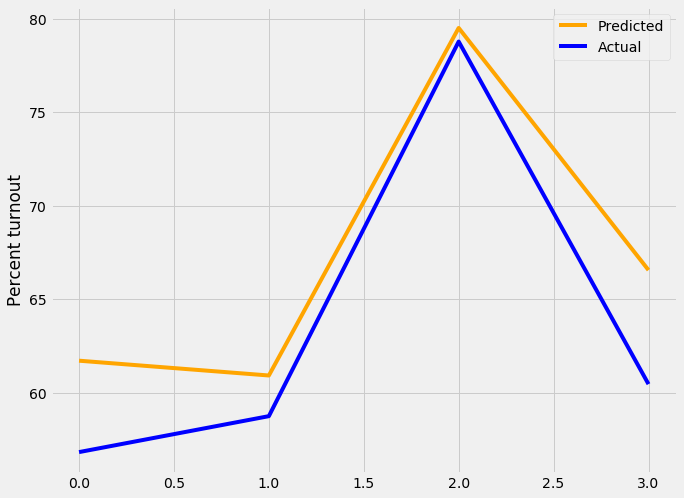

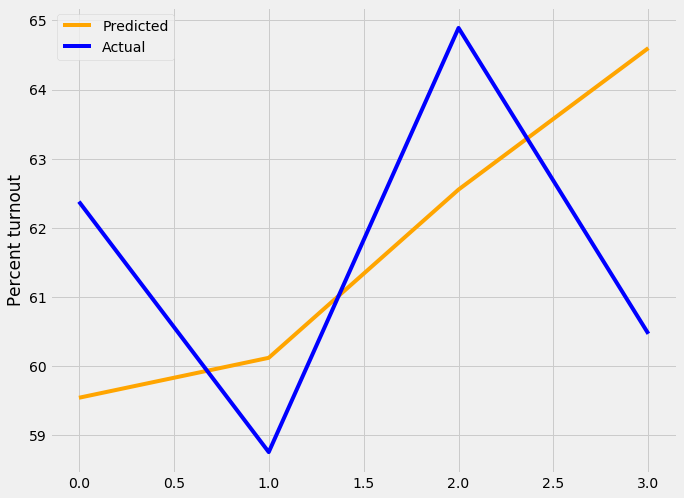

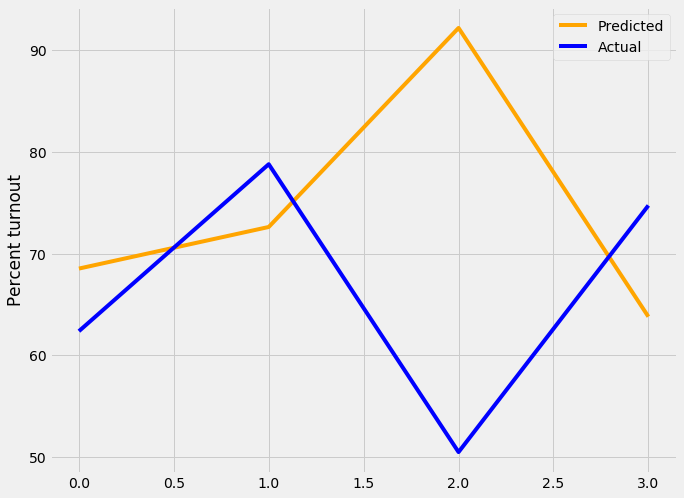

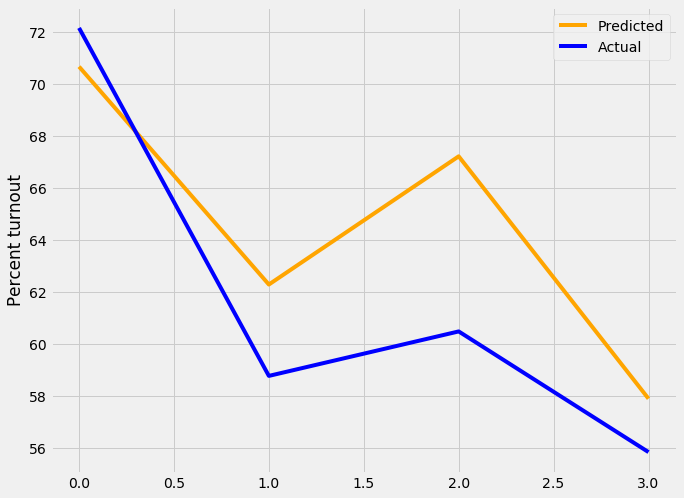

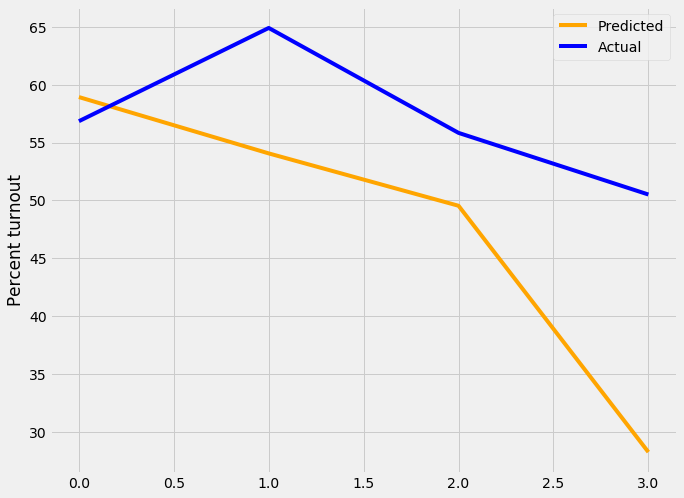

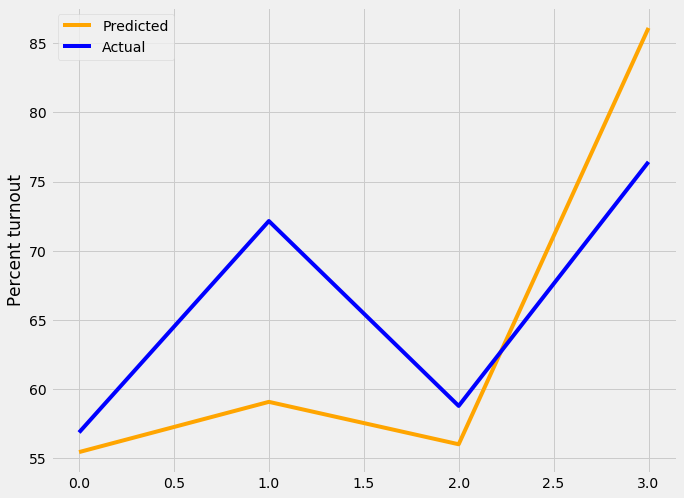

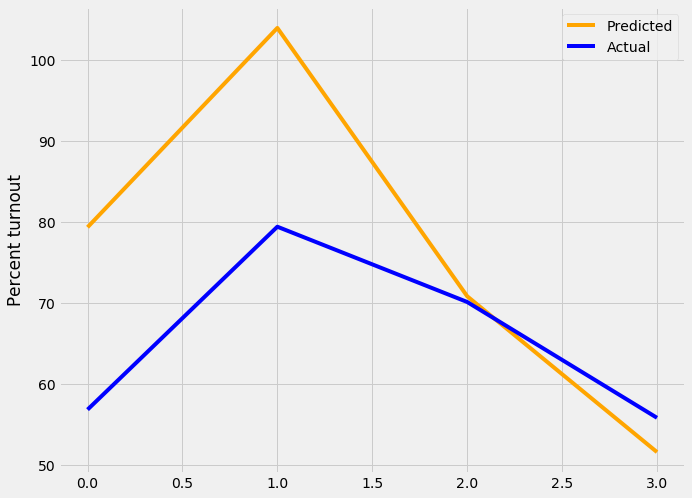

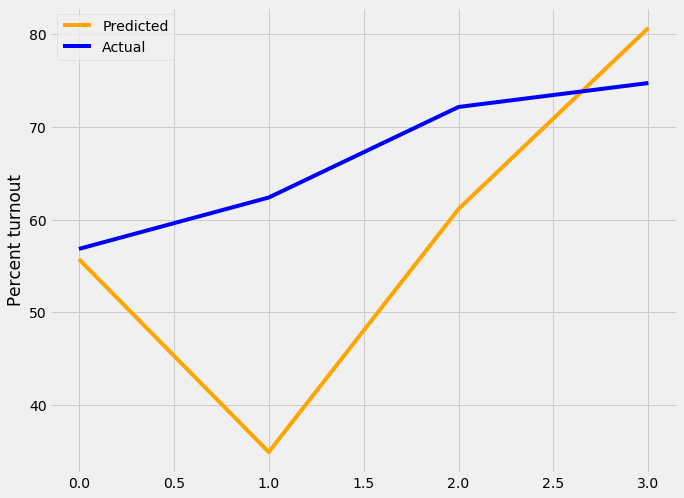

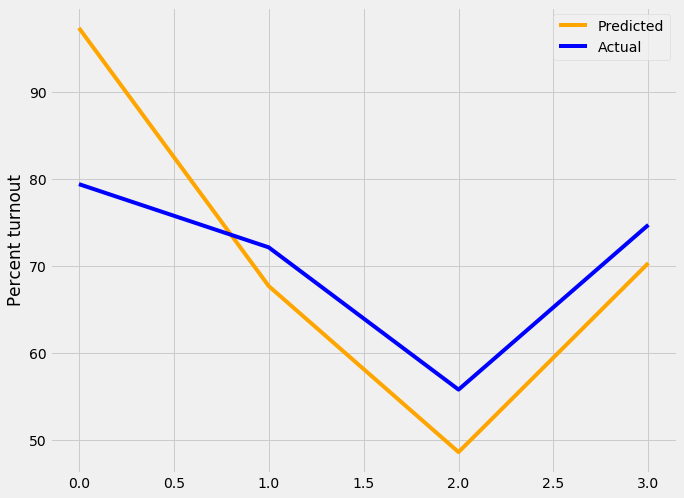

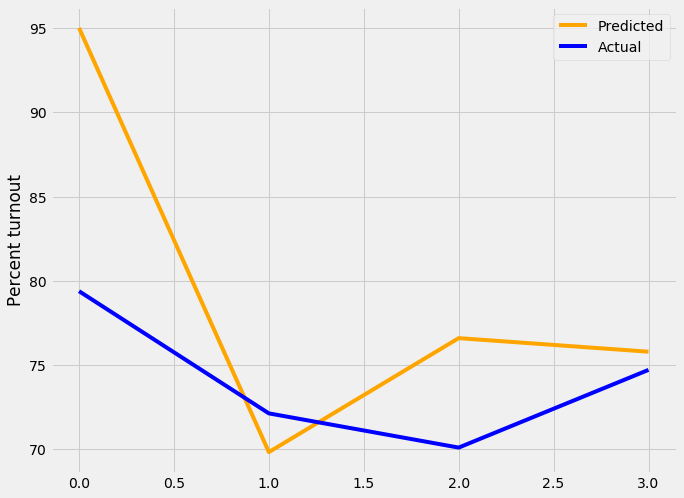

In [110]:
plot_ols(X,y)

The average error for OLS is 5.490467103488506


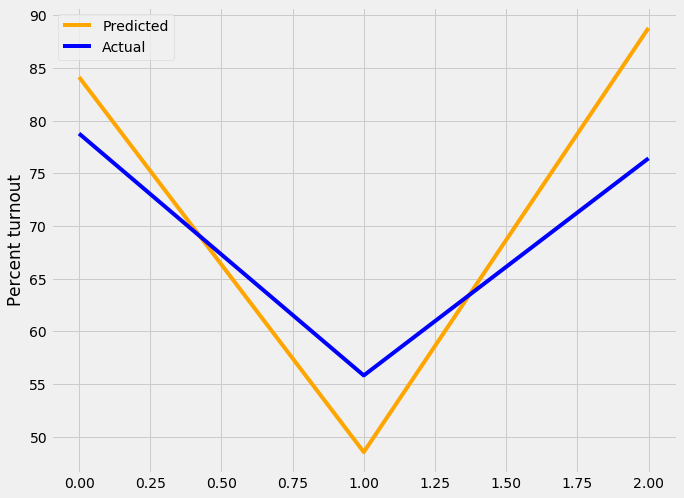

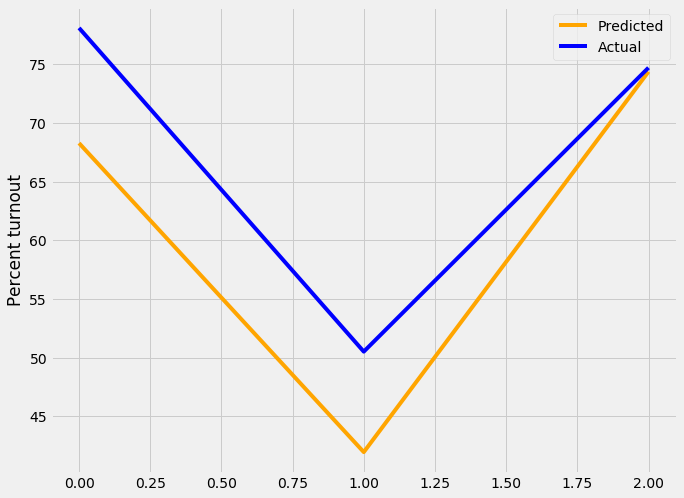

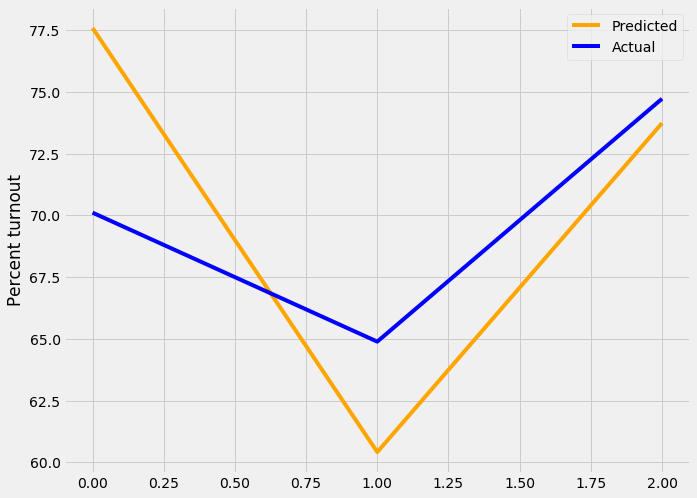

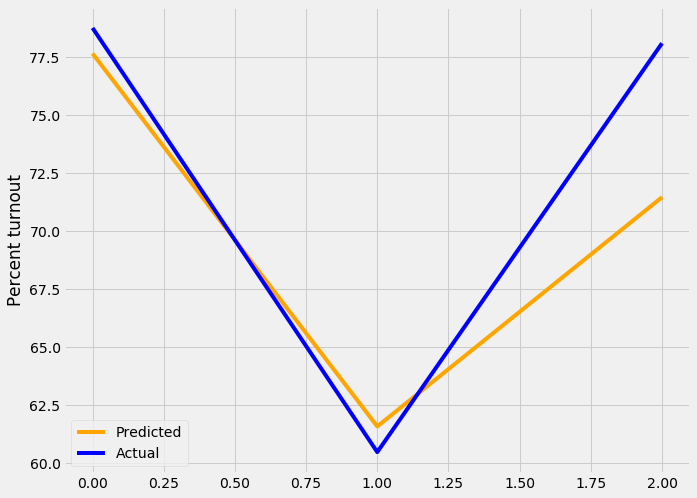

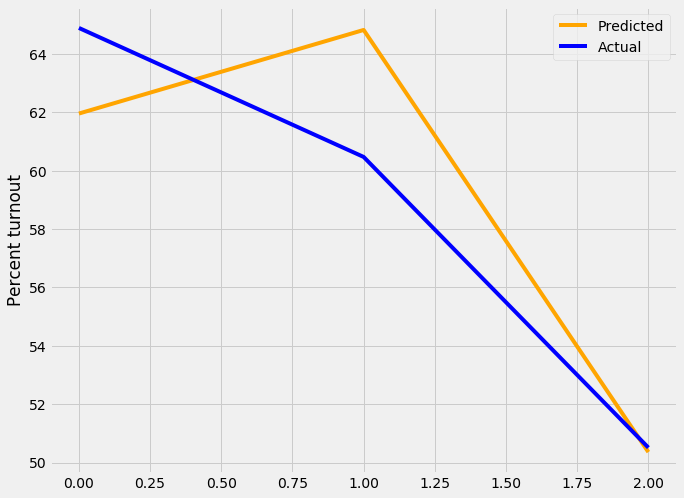

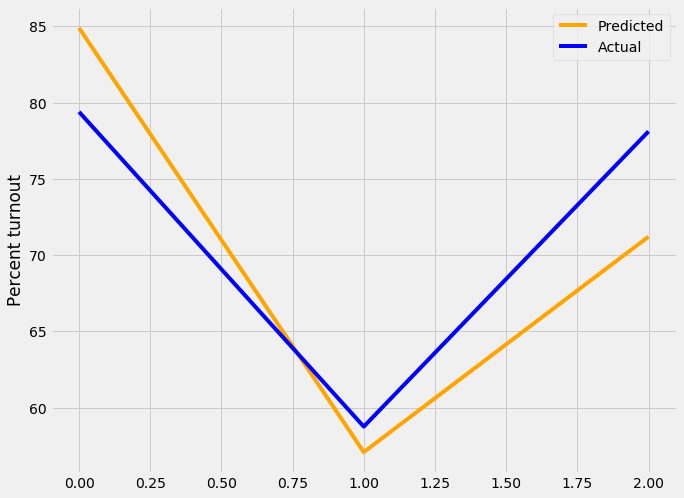

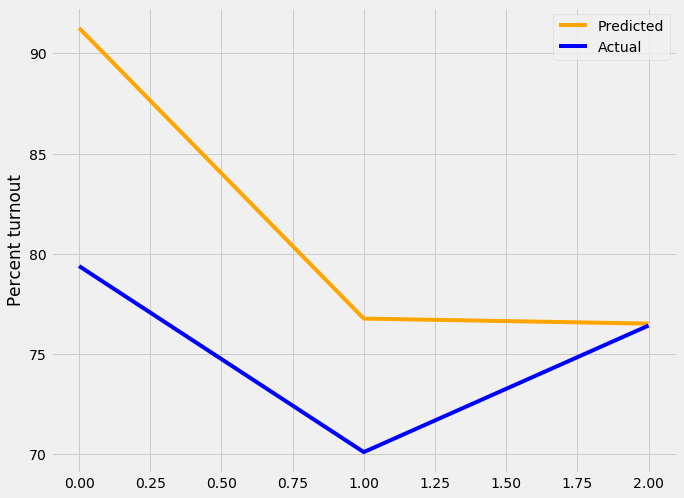

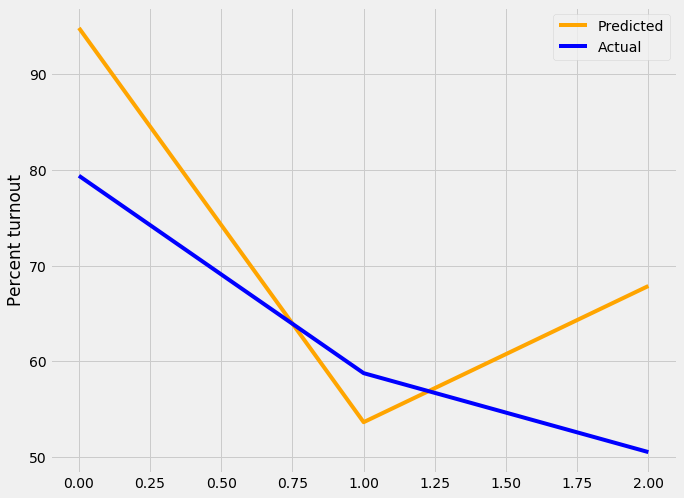

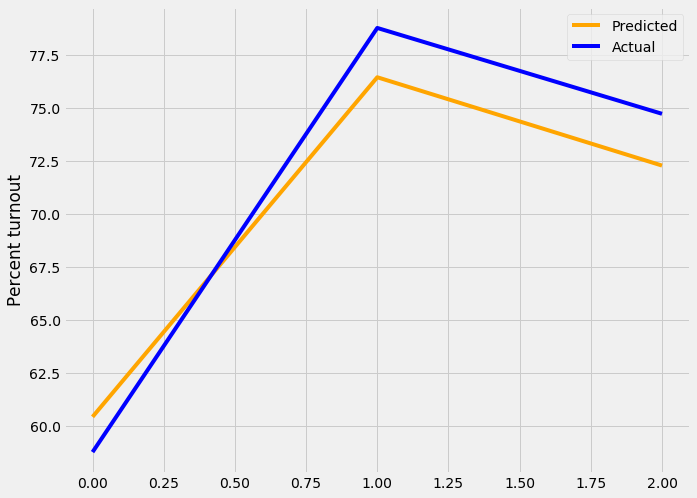

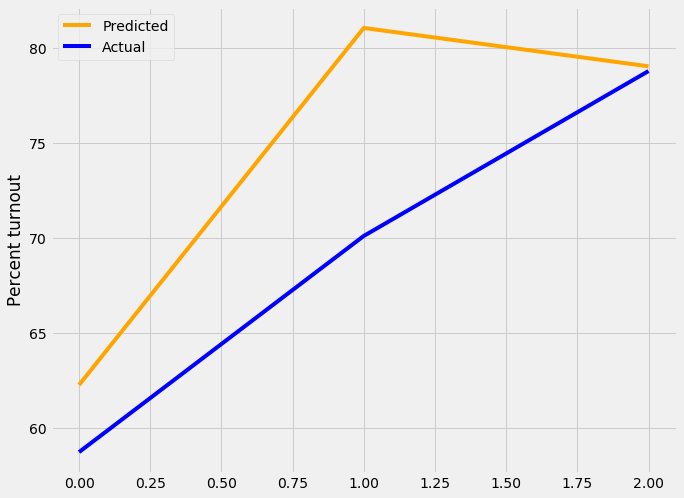

In [111]:
plot_ols(X,y,r=0.85)

In [112]:
plot_ols(X,y,n=100,r=0.85,supress=True)

The average error for OLS is 7.219364941021855


### 2.Lasso

In [119]:
def plot_lasso(X,y,r=0.75,n=10,supress=False):
    #plot_ols randomly selects testing and training data n times, regresses using lasso and
    #computes average error (cross-validation)
    # Inputs:
    # X is an nxn feature matrix (n-array of n-arrays)
    # y is an n-dim output vector
    # r is the test-train ratio. If none is given, it is set to 0.75 by default
    # n is the number of random sample iterations. If none is given, it is set to 10
    # if supress is true, no plots are made
       
    errors=[]
    for i in range(0,n):
        [X_train, y_train, X_test, y_test]=test_train_sample(X,y,r)
        from sklearn import linear_model

        clf = linear_model.Lasso(alpha=0.1)
        clf.fit(X_train,y_train)

        y_pred=clf.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot(range(0,len(y_pred)),y_pred,color='orange',label='Predicted')
            plt.plot(range(0,len(y_pred)),y_test,color='blue',label='Actual')
            plt.legend()
            # See what features were selected
            # Let us see which features it picked
            t=[]
            for i in range(0,len(clf.coef_)):
                if clf.coef_[i]!=0:
                    t.append(i)
            print('Features selected:', df_ml.columns[t])
        

    error=np.mean(errors)
    print('The average error for Lasso is',error)

Features selected: Index(['EDUC_0.0', 'high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['EDUC_0.0', 'high', 'low', 'precipitation', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['EDUC_0.0', 'high', 'low', 'precipitation', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['INC0-10k', 'EDUC_0.0', 'high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['INC0-10k', 'EDUC_0.0', 'high', 'low', 'wind', 'pres'], dtype='object')
Features selected: Index(['EDUC_0.0', 'high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['INC0-10k', 'EDUC_0.0', 'high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['EDUC_0.0', 'high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['high', 'low', 'wind', 'pres', 'prim_pt'], dtype='obje

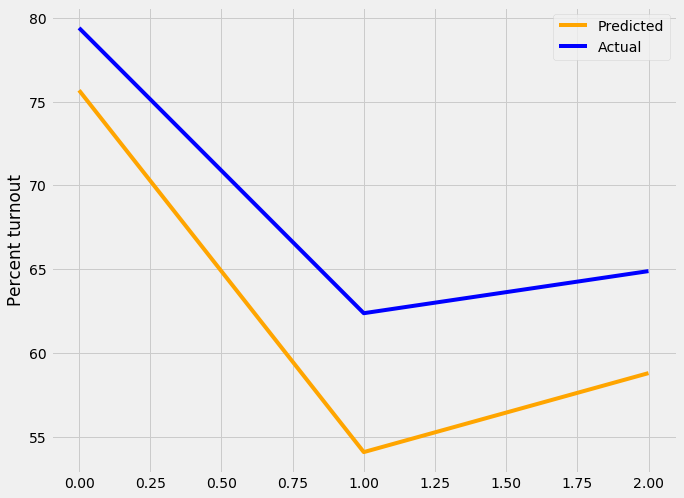

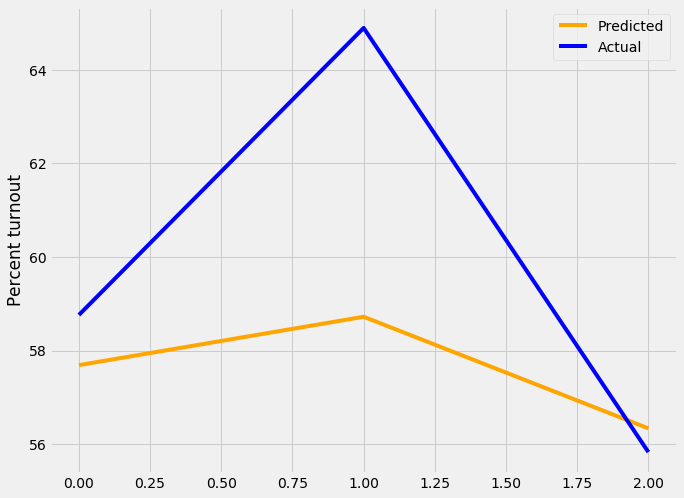

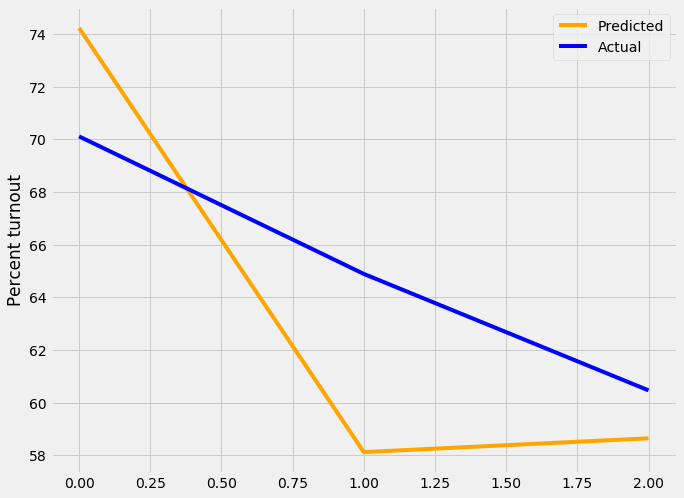

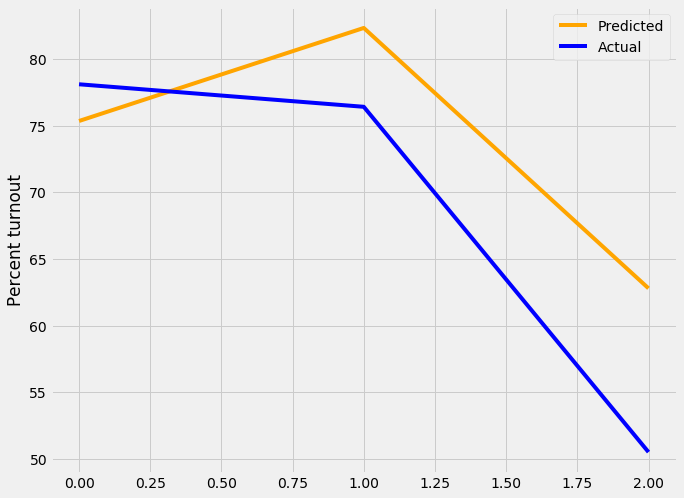

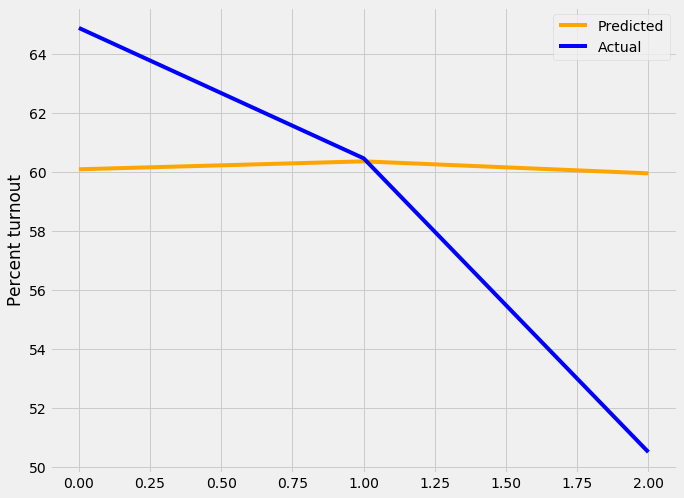

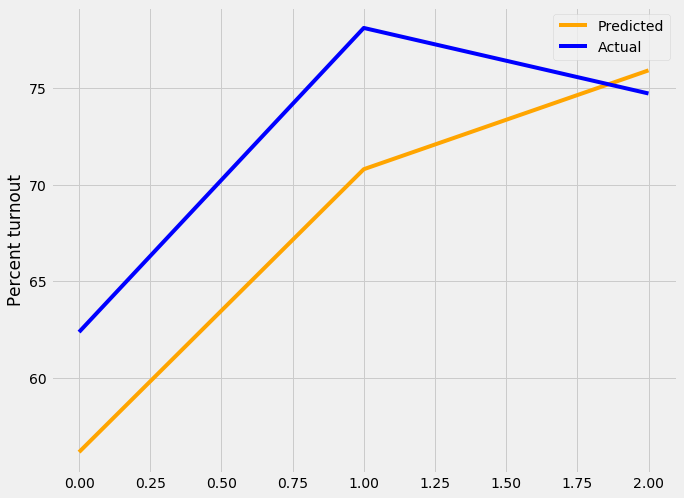

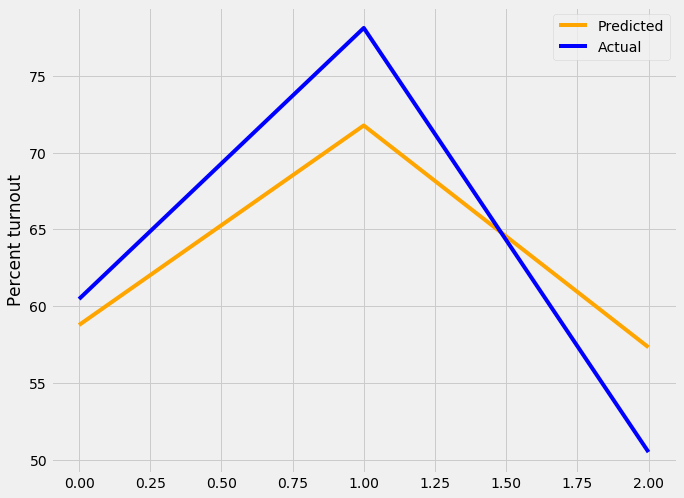

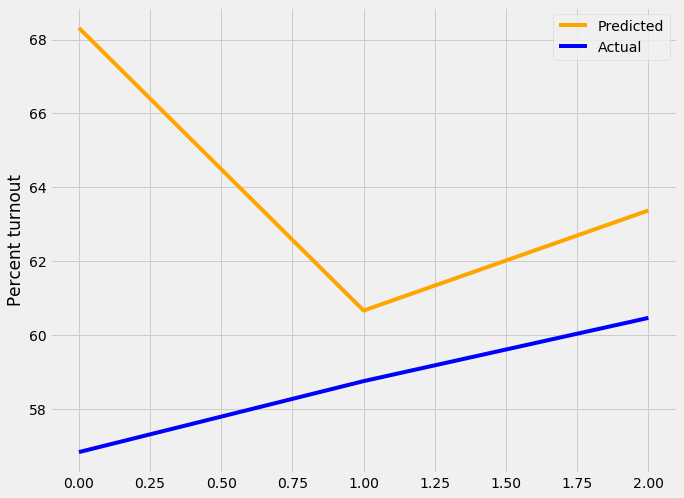

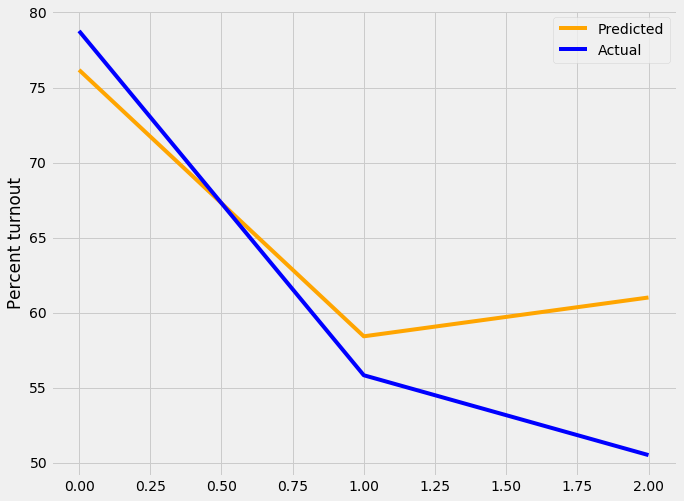

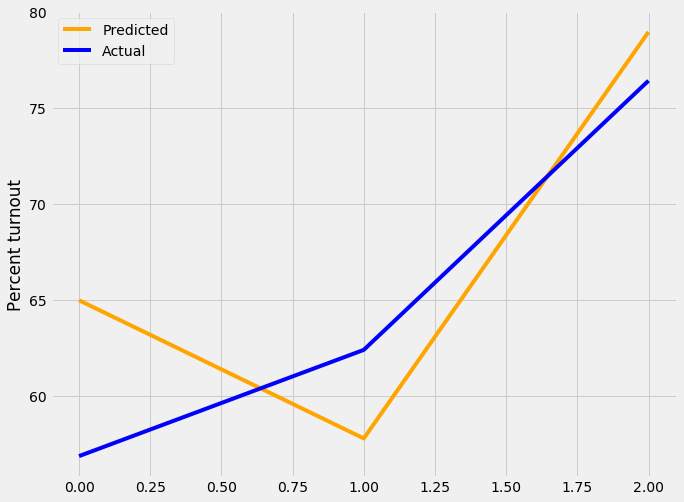

In [120]:
plot_lasso(X,y,r=0.85)

In [124]:
plot_lasso(X,y,n=20,supress=True)

The average error for Lasso is 4.0683063033133955


### 3. Elastic Net

In [138]:
def plot_elastic_net(X,y,r=0.75,n=10,supress=False):
    #plot_ols randomly selects testing and training data n times, regresses using lasso and
    #computes average error (cross-validation)
    # Inputs:
    # X is an nxn feature matrix (n-array of n-arrays)
    # y is an n-dim output vector
    # r is the test-train ratio. If none is given, it is set to 0.75 by default
    # n is the number of random sample iterations. If none is given, it is set to 10
    # if supress is true, no plots are made
    
    from sklearn.linear_model import ElasticNet
       
    errors=[]
    for i in range(0,n):
        [X_train, y_train, X_test, y_test]=test_train_sample(X,y,r)
        
        regr = ElasticNet(random_state=0)
        regr.fit(X_train, y_train)
        y_pred=regr.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot(range(0,len(y_pred)),y_pred,color='orange',label='Predicted')
            plt.plot(range(0,len(y_pred)),y_test,color='blue',label='Actual')
            plt.legend()
            # See what features were selected
            # Let us see which features it picked
            t=[]
            for i in range(0,len(regr.coef_)):
                if regr.coef_[i]!=0:
                    t.append(i)
            print('Features selected:', df_ml.columns[t])
        

    error=np.mean(errors)
    print('The average error for Elastic Net is',error)

Features selected: Index(['high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['INC0-10k', 'high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['INC0-10k', 'low', 'wind', 'pres'], dtype='object')
Features selected: Index(['INC0-10k', 'high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['high', 'low', 'precipitation', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['INC0-10k', 'high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['INC0-10k', 'high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
Features selected: Index(['high', 'low', 'wind', 'pres', 'prim_pt'], dtype='object')
The average error for Elastic Net is 11.66863791270803


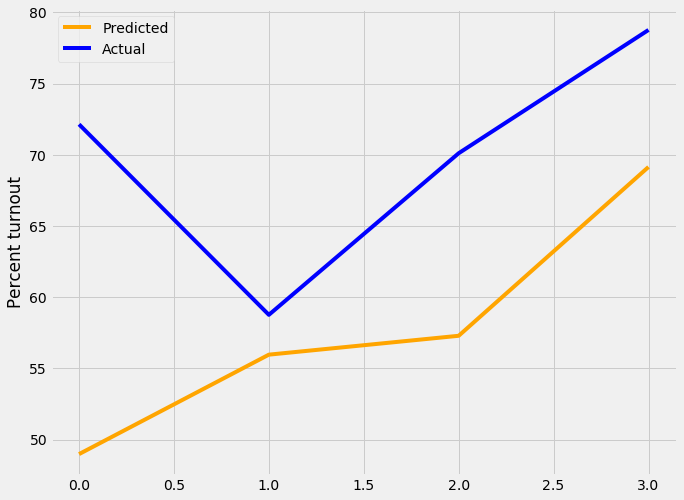

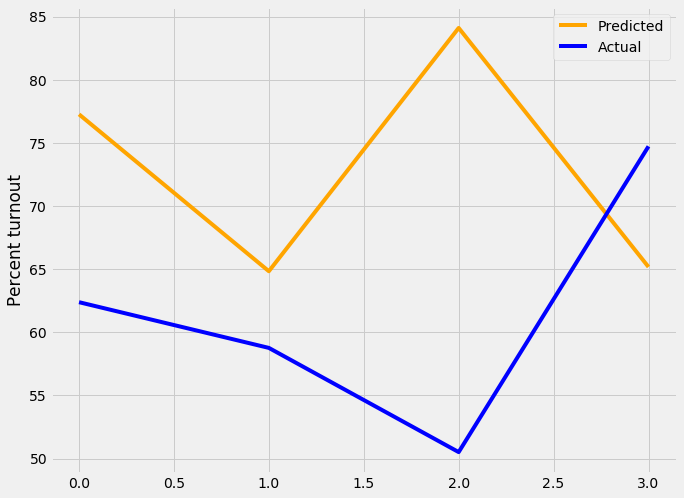

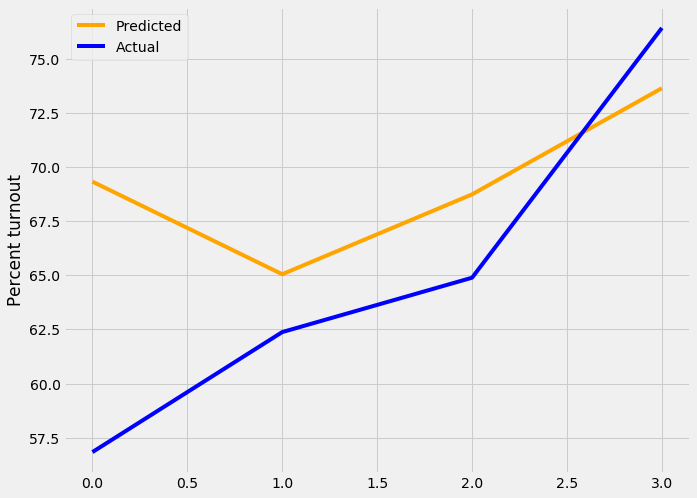

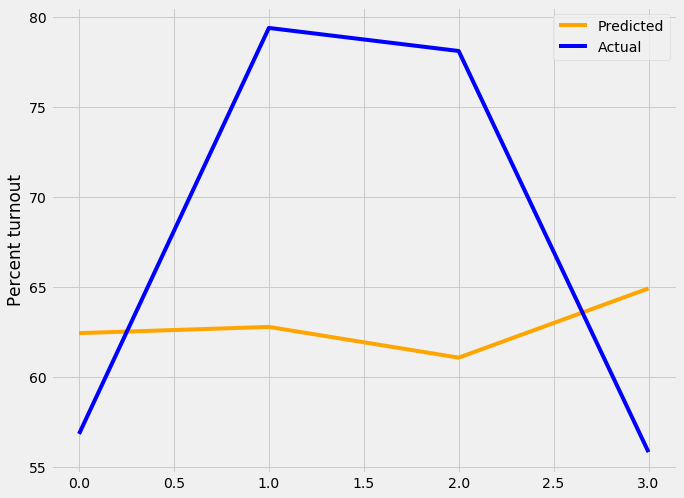

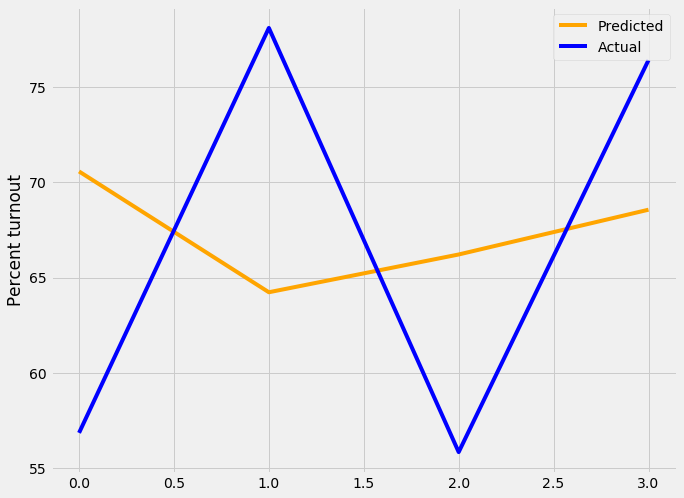

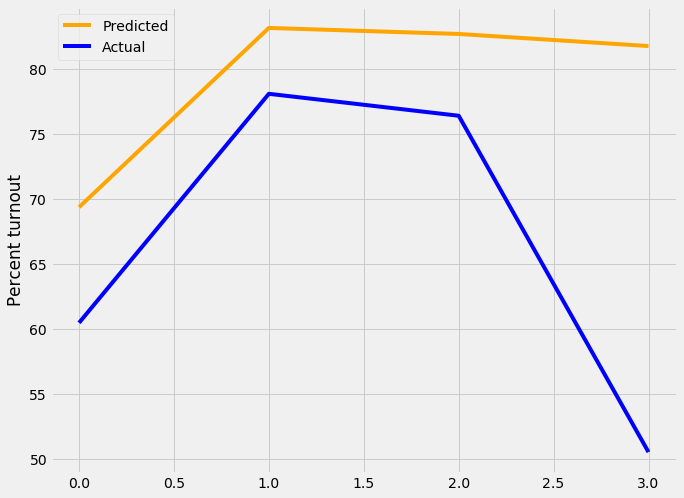

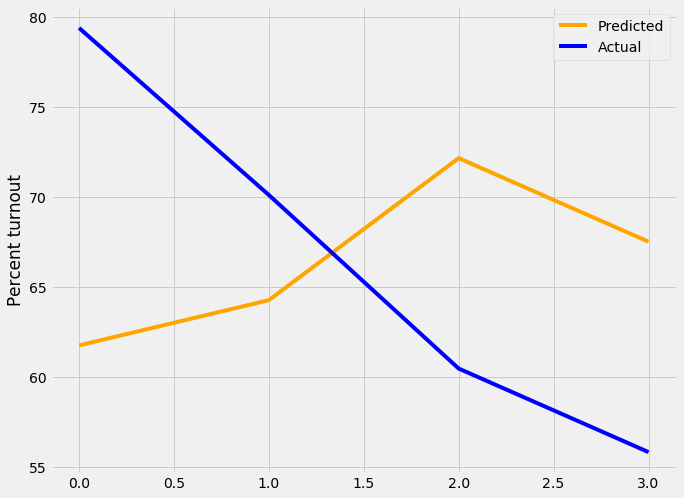

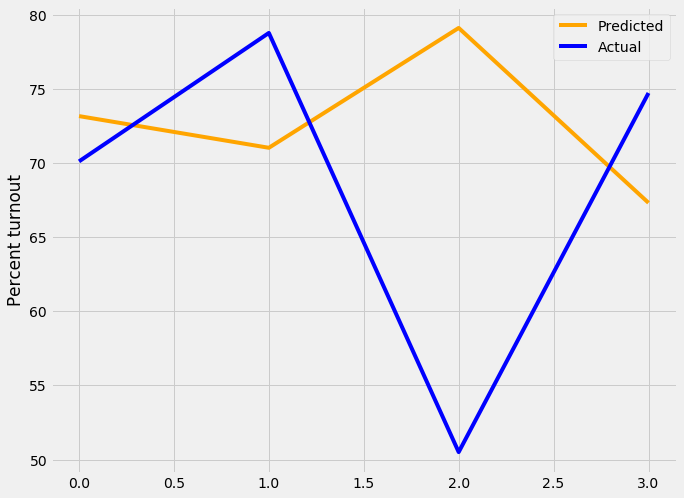

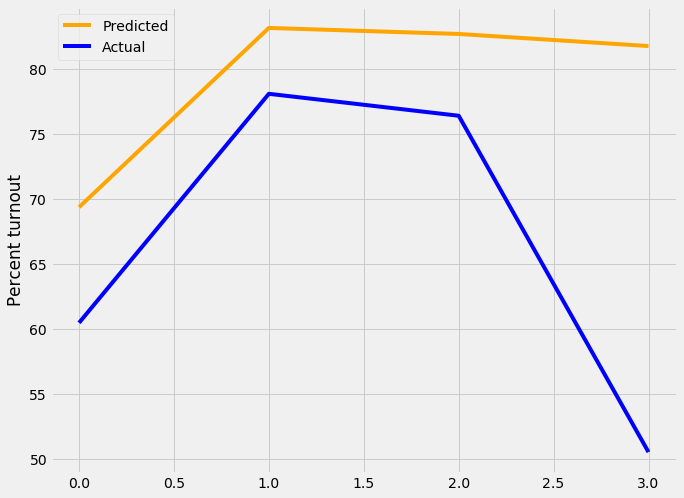

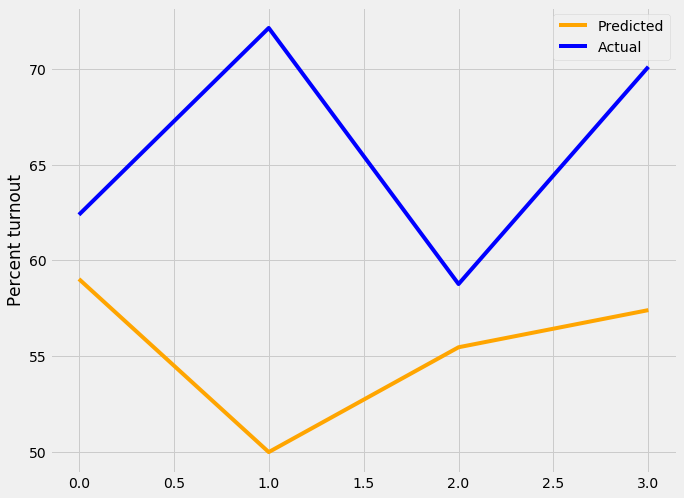

In [133]:
plot_elastic_net(X,y)

In [135]:
plot_elastic_net(X,y,r=0.85,supress=True)

The average error for Elastic Net is 10.147145002999686


### 4. Decision Tree

In [143]:
def plot_decision_tree(X,y,r=0.75,n=10,d=2,supress=False):
    #plot_ols randomly selects testing and training data n times, regresses using lasso and
    #computes average error (cross-validation)
    # Inputs:
    # X is an nxn feature matrix (n-array of n-arrays)
    # y is an n-dim output vector
    # r is the test-train ratio. If none is given, it is set to 0.75 by default
    # d is the max depth, set to 2 if not given
    # n is the number of random sample iterations. If none is given, it is set to 10
    # if supress is true, no plots are made
    
    from sklearn.tree import DecisionTreeRegressor
       
    errors=[]
    for i in range(0,n):
        [X_train, y_train, X_test, y_test]=test_train_sample(X,y,r)
        
        clf = DecisionTreeRegressor(max_depth=d)
        clf = clf.fit(X, y)
        y_pred=clf.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot(range(0,len(y_pred)),y_pred,color='orange',label='Predicted')
            plt.plot(range(0,len(y_pred)),y_test,color='blue',label='Actual')
            plt.legend()
        

    error=np.mean(errors)
    print('The average error for decision tree is',error)

The average error for decision tree is 1.8963166666666669


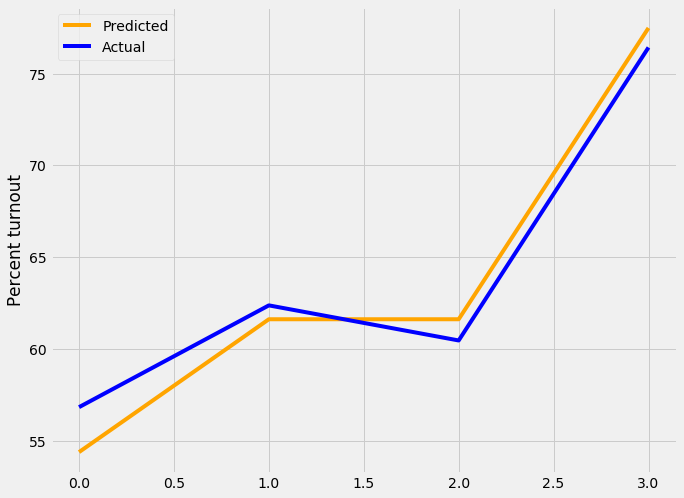

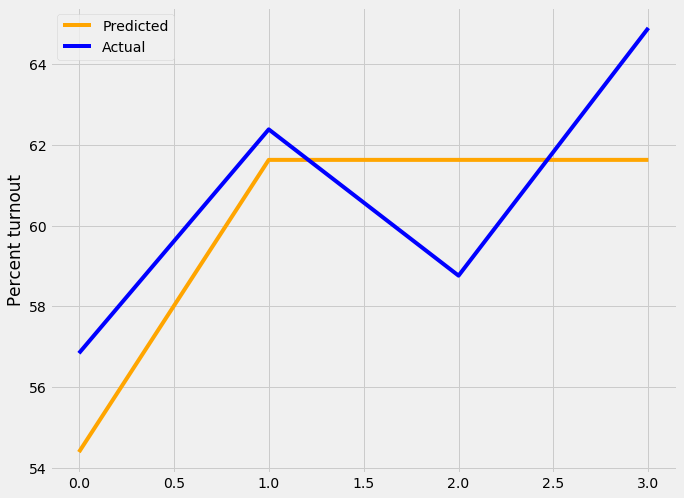

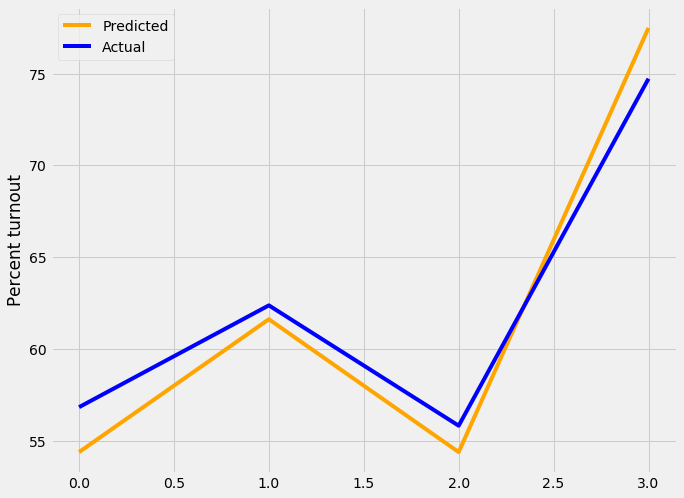

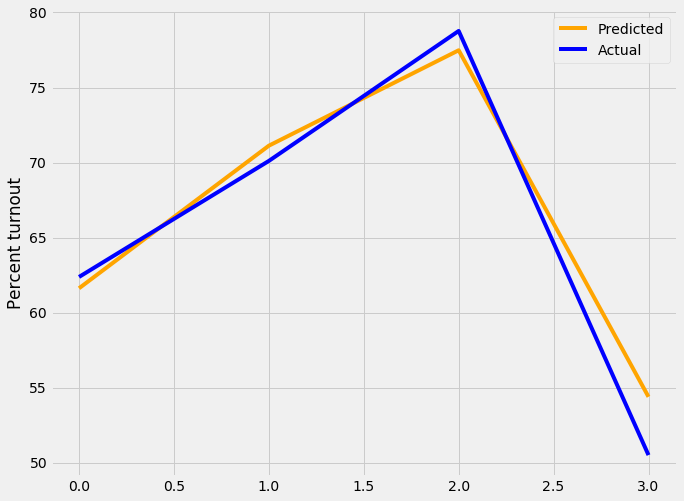

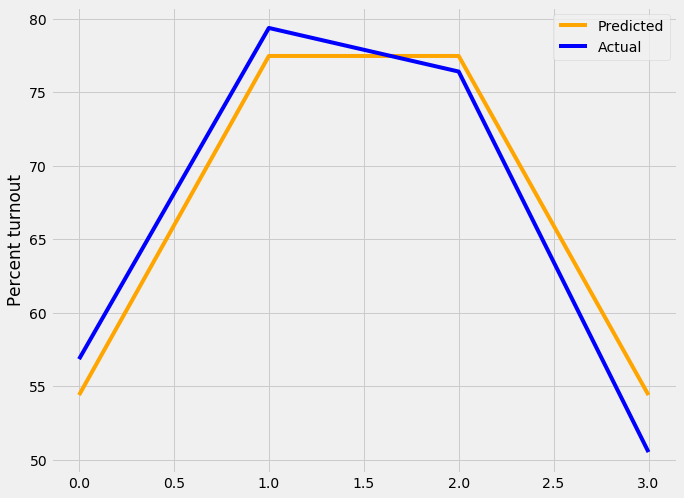

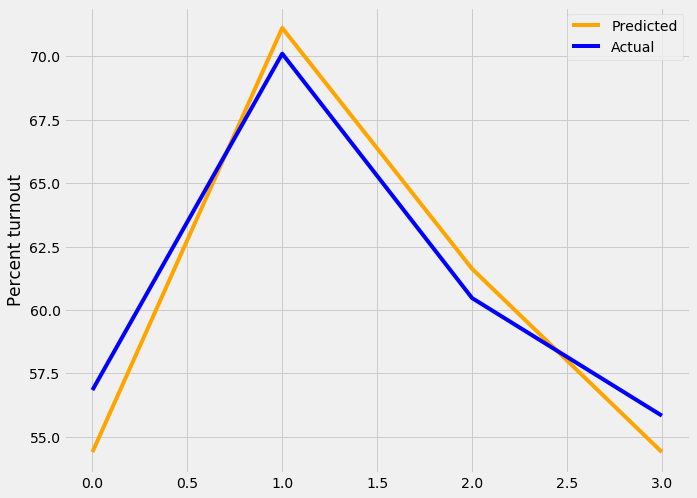

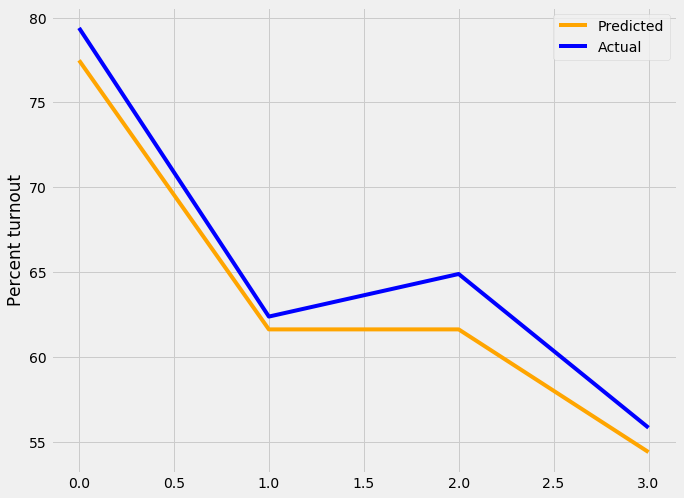

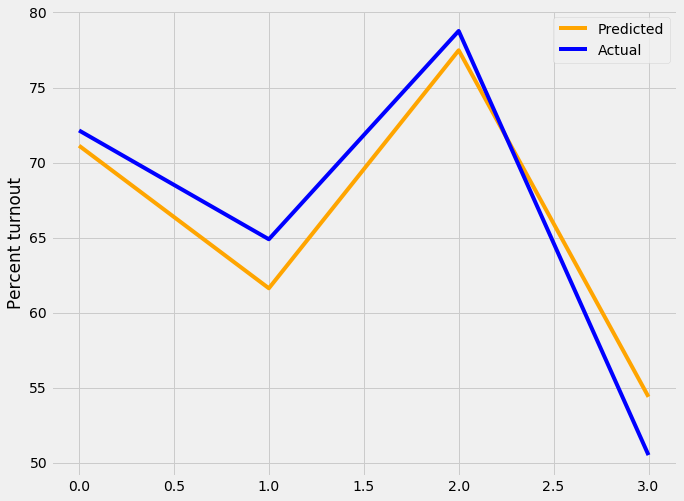

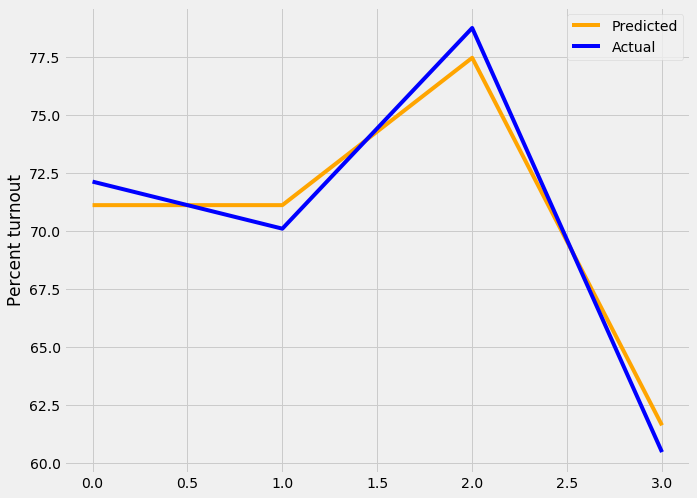

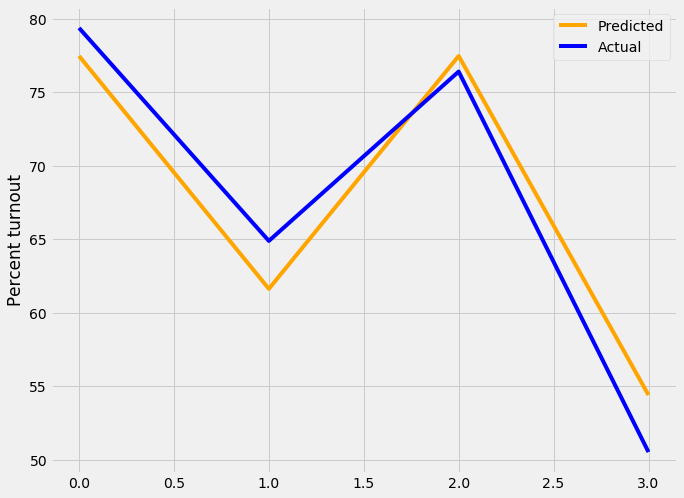

In [146]:
plot_decision_tree(X,y)

The desision tree with all of the features seems to be performing very well, but has bad interpretability. We'll probably use it for our predictions, but for now, let us also try to reduce the number of features before training.

## Train (select features first)

In what follows, we first use SelectKBest to reduce the number of features and then we train. As usual, we start with the simplest thing. Ordinary Least Squares.

### 1. Ordinary Least Squares

In [148]:
def plot_ols_select(X,y,r=0.75,n=10,m=10,supress=False):
    #plot_ols randomly selects testing and training data n times, fits ordinary least squares model and
    #computes average error (cross-validation)
    # Inputs:
    # X is an nxn feature matrix (n-array of n-arrays)
    # y is an n-dim output vector
    # r is the test-train ratio. If none is given, it is set to 0.75 by default
    # n is the number of random sample iterations. If none is given, it is set to 10
    # m is the number of best features to be selected
    # if supress is true, no plots are made
    
    #First select m best features
    from sklearn.feature_selection import SelectKBest, f_regression

    X_new = SelectKBest(f_regression, k=m).fit_transform(np.asarray(X), y)
    indeces=SelectKBest(f_regression,k=m).fit(np.asarray(X),y).get_support(True) #Selected features
    indeces=np.asarray(indeces).astype(int)
    print('The features selected were:', df_ml.columns[indeces])
    
    
    from sklearn import linear_model
    
    reg = linear_model.LinearRegression()
    errors=[]
    for i in range(0,n):
        [X_train, y_train, X_test, y_test]=test_train_sample(X_new,y,r)        
        reg.fit(X_train, y_train) 
        y_pred=reg.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot(range(0,len(y_pred)),y_pred,color='orange',label='Predicted')
            plt.plot(range(0,len(y_pred)),y_test,color='blue',label='Actual')
            plt.legend()

    error=np.mean(errors)
    print('The average error for OLS with %d features is'%(m),error)

In [153]:
plot_ols_select(X,y,m=10,supress=True)
plot_ols_select(X,y,m=20,supress=True)
plot_ols_select(X,y,m=30,supress=True)

The features selected were: Index(['EDUC_0.0', 'EDUC_1.0', 'EDUC_2.0', 'EDUC_3.0', 'EDUC_4.0', 'EDUC_5.0',
       'EDUC_6.0', 'MARST_5.0', 'pres', 'prim_pt'],
      dtype='object')
The average error for OLS with 10 features is 57.443315467505215
The features selected were: Index(['AGE18-34', 'AGE35-49', 'EDUC_0.0', 'EDUC_1.0', 'EDUC_2.0', 'EDUC_3.0',
       'EDUC_4.0', 'EDUC_5.0', 'EDUC_6.0', 'EMPSTAT_0.0', 'EMPSTAT_3.0',
       'HISPAN_2', 'MARST_2.0', 'MARST_3.0', 'MARST_5.0', 'RACE_5', 'RACE_7',
       'low', 'pres', 'prim_pt'],
      dtype='object')
The average error for OLS with 20 features is 16.85107990680953
The features selected were: Index(['AGE0-17', 'AGE18-34', 'AGE35-49', 'INC20k-40k', 'INC40k-60k',
       'EDUC_0.0', 'EDUC_1.0', 'EDUC_2.0', 'EDUC_3.0', 'EDUC_4.0', 'EDUC_5.0',
       'EDUC_6.0', 'EDUC_8.0', 'EMPSTAT_0.0', 'EMPSTAT_3.0', 'HISPAN_2',
       'HISPAN_3', 'HISPAN_4', 'MARST_2.0', 'MARST_3.0', 'MARST_5.0', 'RACE_3',
       'RACE_5', 'RACE_7', 'high', 'low', 'pre

From this we see that ordinary least squares needs a lot of features in order to be somewhat accurate. Next, let us try

### 2. SVR

In [158]:
def plot_svr_select(X,y,ker,r=0.75,n=10,m=10,gam=0,deg=0,supress=False):
    # Inputs:
    # X is an nxn feature matrix (n-array of n-arrays)
    # y is an n-dim output vector
    # r is the test-train ratio. If none is given, it is set to 0.75 by default
    # n is the number of random sample iterations. If none is given, it is set to 10
    # m is the number of best features to be selected
    # kernel can be 'rbf', 'linear', or 'poly'. If 'rbf' is given then a value for gamma is needed. If 'poly' is selected,
    # a value for the degree is needed
    # if supress is true, no plots are made
    
    #First select m best features
    from sklearn.feature_selection import SelectKBest, f_regression

    X_new = SelectKBest(f_regression, k=m).fit_transform(np.asarray(X), y)
    indeces=SelectKBest(f_regression,k=m).fit(np.asarray(X),y).get_support(True) #Selected features
    indeces=np.asarray(indeces).astype(int)
    #print('The features selected were:', df_ml.columns[indeces])
    
    
    from sklearn import svm
    errors=[]
    for i in range(0,n):
        [X_train, y_train, X_test, y_test]=test_train_sample(X_new,y,r)        
        if ker=='rbf':
            clf = svm.SVR(kernel='rbf', C=1e3, gamma=gam)
        elif ker=='poly':
            clf = svm.SVR(kernel='poly', C=1e3, degree=deg)
        else:
            clf = svm.SVR(kernel=ker, C=1e3)
        clf.fit(X_train, y_train) 
        y_pred=clf.predict(X_test)
      
        # Compute average error
        errors.append(np.mean(abs(np.array(y_test)-np.array(y_pred))))
        
        if supress==False:    
            # Quick plot
            plt.figure(i,figsize=(10,8))
            plt.ylabel('Percent turnout')
            plt.plot(range(0,len(y_pred)),y_pred,color='orange',label='Predicted')
            plt.plot(range(0,len(y_pred)),y_test,color='blue',label='Actual')
            plt.legend()

    error=np.mean(errors)
    print('The average error for SVR with %d features is'%(m),error)          

The average error for SVR with 8 features is 13.552044028864483


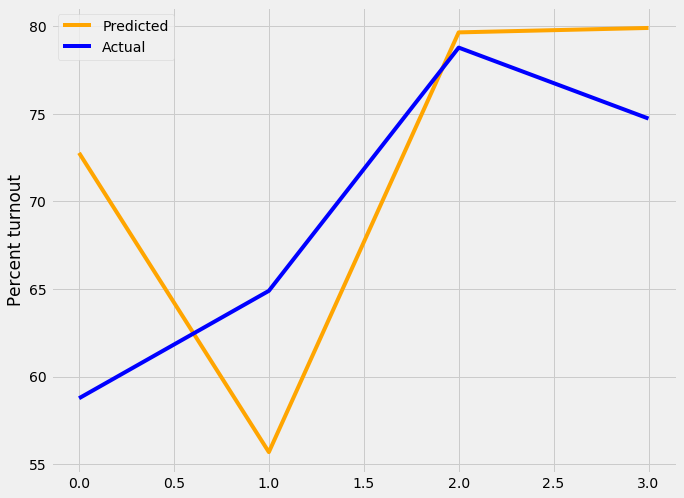

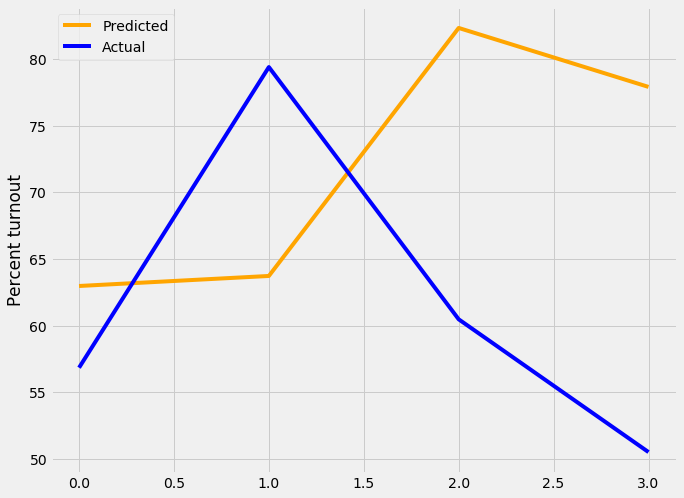

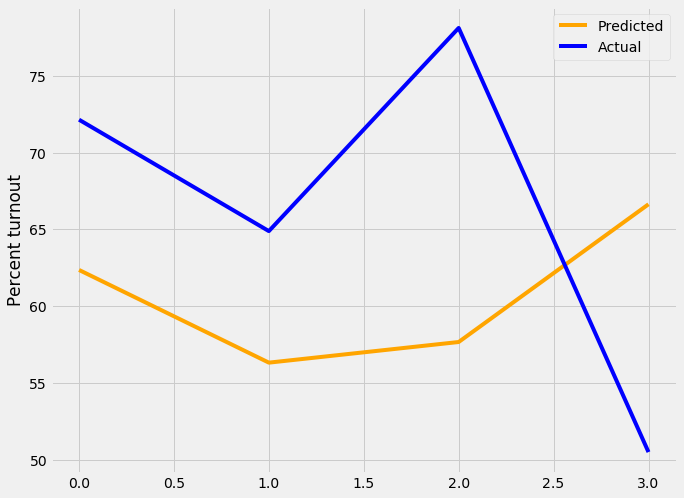

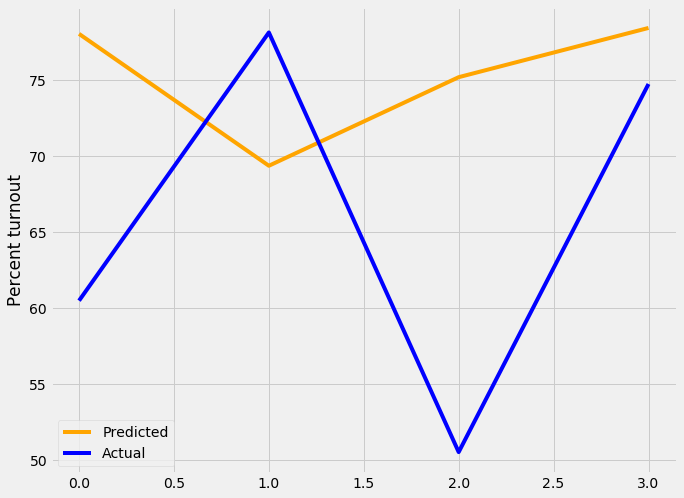

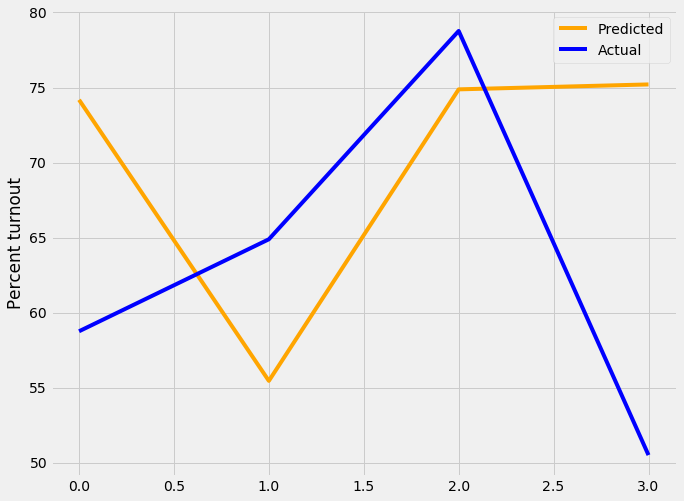

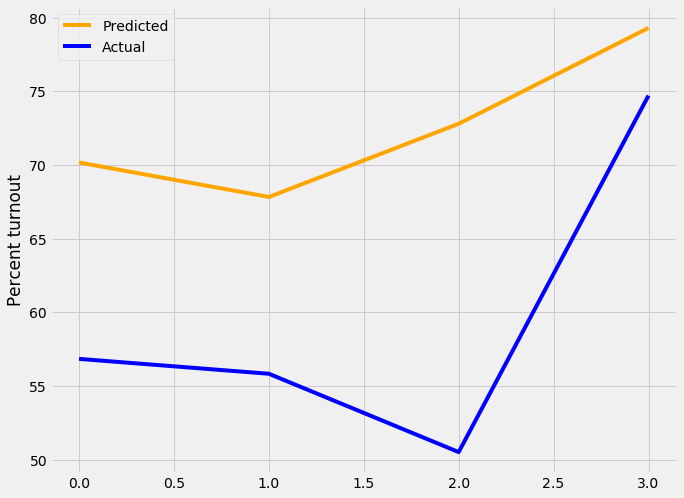

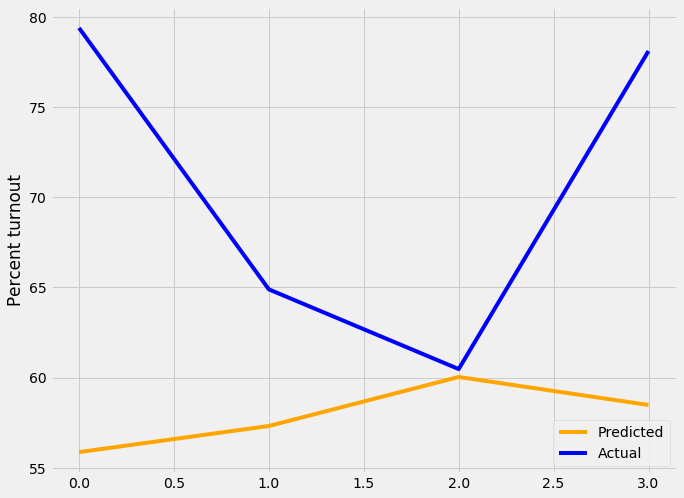

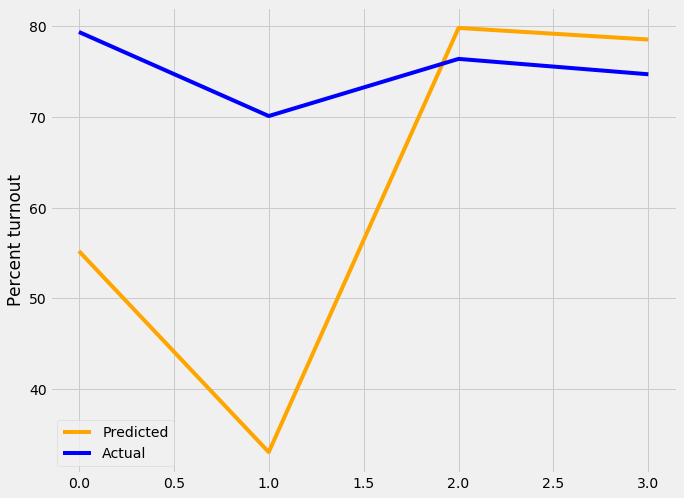

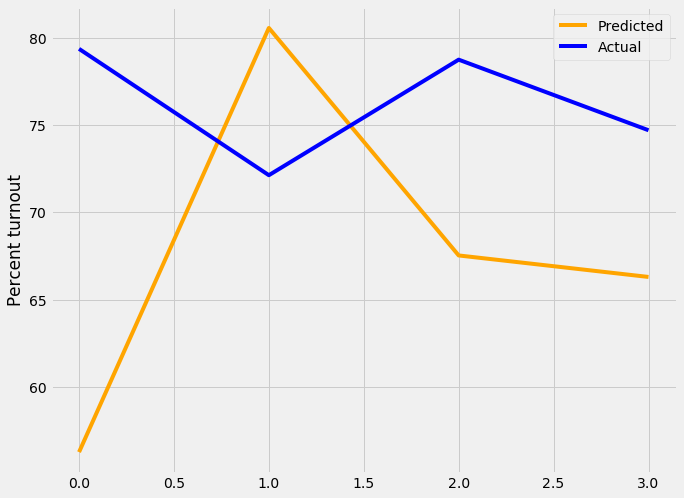

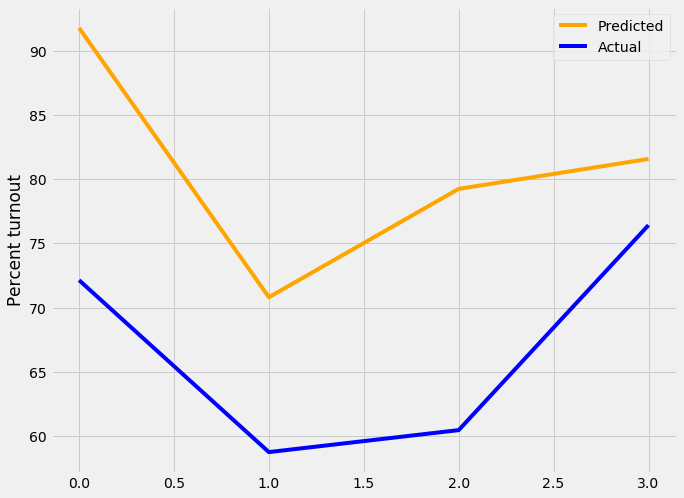

In [161]:
plot_svr_select(X,y,ker='rbf',gam=0.1,m=8)

In [162]:
plot_svr_select(X,y,ker='rbf',gam=0.1,m=10,supress=True)
plot_svr_select(X,y,ker='rbf',gam=0.1,m=12,supress=True)
plot_svr_select(X,y,ker='rbf',gam=0.1,m=15,supress=True)

The average error for SVR with 10 features is 12.840117782860048
The average error for SVR with 12 features is 11.815557655791778
The average error for SVR with 15 features is 8.898338954946759


In [165]:
plot_svr_select(X,y,ker='poly',deg=2,m=10,supress=True)

The average error for SVR with 10 features is 7.854190611442701
